In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#sampleSubmission = pd.read_csv('/content/SampleSubmission.csv')
blogs = pd.read_csv('/content/Blogs.csv')
comments = pd.read_csv('/content/Comments.csv')
comp = pd.read_csv('/content/Competition.csv')
cp = pd.read_csv('/content/CompetitionPartipation.csv')
disc = pd.read_csv('/content/Discussion.csv')
jobs = pd.read_csv('/content/Jobs.csv')
useract = pd.read_csv('/content/UserActivity.csv')
users = pd.read_csv('/content/Users.csv')
#variableDefinitions = pd.read_csv('/content/VariableDefinitions.csv')


# useract

In [ ]:
useract.head()

,User_ID,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23


In [ ]:
useract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   User_ID                317292 non-null  object
 1   Title                  317292 non-null  object
 2   datetime time          317292 non-null  object
 3   datetime Year          317292 non-null  int64 
 4   datetime Month         317292 non-null  int64 
 5   datetime Day_of_month  317292 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 14.5+ MB


In [ ]:
col = useract.columns

for c in col:
  print(c)
  print(useract[c].nunique())

User_ID
10400
Title
397
datetime time
78241
datetime Year
1
datetime Month
7
datetime Day_of_month
31


In [ ]:
useract.drop(['datetime time' ,'datetime Year'],axis=1,inplace=True)
useract.head()

,User_ID,Title,datetime Month,datetime Day_of_month
0,ID_RT43AK77,comp_ID_IV5D,11,22
1,ID_RT43AK77,comp_ID_IV5D,11,23
2,ID_RT43AK77,comp_ID_IV5D,11,23
3,ID_RT43AK77,comp_ID_IV5D,11,23
4,ID_RT43AK77,comp_ID_IV5D,11,23


In [ ]:
useract.rename(columns={'datetime Month': 'useract_month'},  inplace = True)
useract.rename(columns={'datetime Day_of_month': 'useract_day'},  inplace = True)

In [ ]:
useract['isblog'] = useract['Title'].str.contains('blog_ID').astype(int)
useract['iscomp'] = useract['Title'].str.contains('comp_ID').astype(int)
useract['isjob'] = useract['Title'].str.contains('job_ID').astype(int)

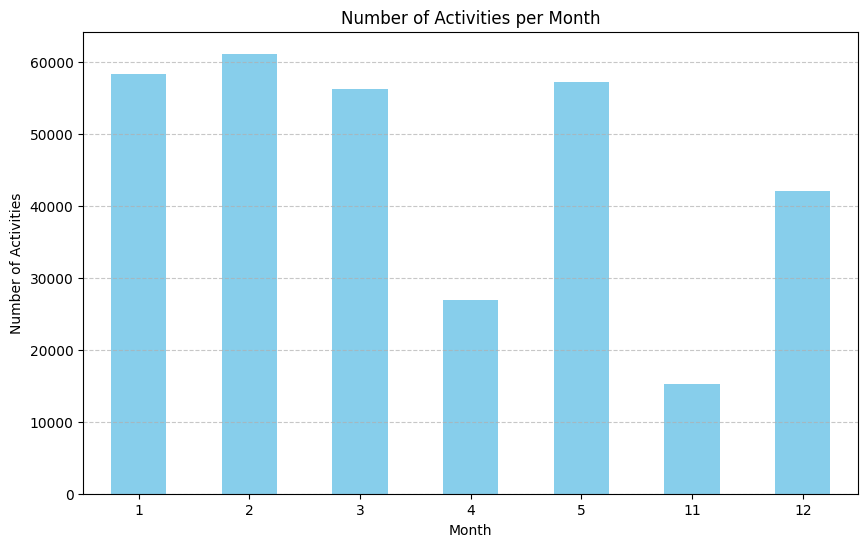

In [ ]:
#month with the most activity

month_activity = useract['useract_month'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))
month_activity.plot(kind='bar', color='skyblue')
plt.title('Number of Activities per Month')
plt.xlabel('Month')
plt.ylabel('Number of Activities')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# users

In [ ]:
users.head()

,FeatureX,FeatureY,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,1,16


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12413 entries, 0 to 12412
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   FeatureX                 12413 non-null  int64 
 1   FeatureY                 12413 non-null  int64 
 2   User_ID                  12413 non-null  object
 3   Countries_ID             6531 non-null   object
 4   Created At time          12413 non-null  object
 5   Created At Year          12413 non-null  int64 
 6   Created At Month         12413 non-null  int64 
 7   Created At Day_of_month  12413 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 775.9+ KB


In [ ]:
col = users.columns

for c in col:
  print(c)
  print(users[c].nunique())

FeatureX
2
FeatureY
3
User_ID
12413
Countries_ID
146
Created At time
12413
Created At Year
1
Created At Month
7
Created At Day_of_month
31


In [ ]:
users.rename(columns={'Created At Month': 'user_month'},  inplace = True)
users.rename(columns={'Created At Day_of_month': 'user_day'},  inplace = True)
users.head()

,FeatureX,FeatureY,User_ID,Countries_ID,Created At time,Created At Year,user_month,user_day
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,1,16


In [ ]:
users.drop(['Created At Year' ,'Created At time','FeatureX','FeatureY'],axis=1,inplace=True)

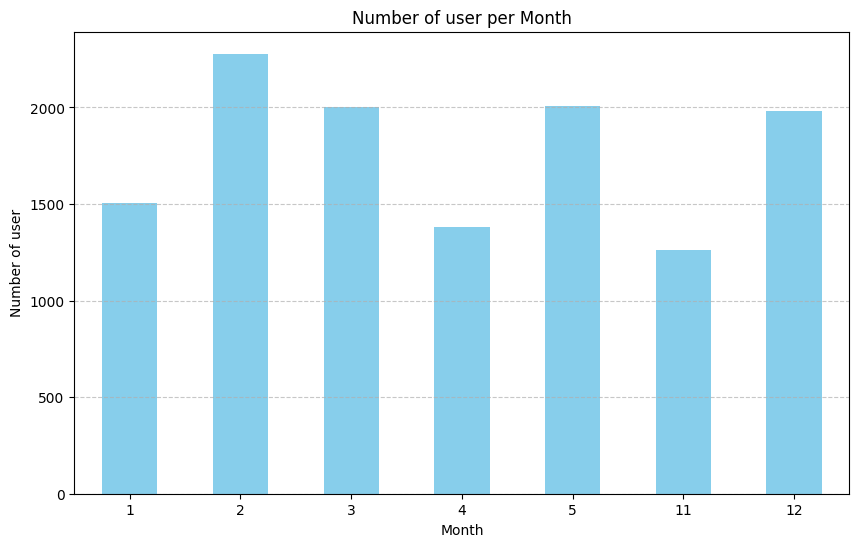

In [ ]:
month_signin = users['user_month'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))
month_signin.plot(kind='bar', color='skyblue')
plt.title('Number of user per Month')
plt.xlabel('Month')
plt.ylabel('Number of user')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# blogs


In [ ]:
blogs.head()

,Theme,blog_ID,Published At time,Published At Year,Published At Month,Published At Day_of_month
0,5.0,ID_Z6MM,10:34:55.071854,5,4,5
1,5.0,ID_7IB3,14:51:13.268049,5,4,5
2,3.0,ID_JR8K,13:19:08.877076,5,4,17
3,2.0,ID_IDAV,17:18:06.151314,5,7,6
4,2.0,ID_7JVL,11:48:36.428428,4,8,25


In [ ]:
blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Theme                      114 non-null    float64
 1   blog_ID                    117 non-null    object 
 2   Published At time          117 non-null    object 
 3   Published At Year          117 non-null    int64  
 4   Published At Month         117 non-null    int64  
 5   Published At Day_of_month  117 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ KB


In [ ]:
col = blogs.columns

for c in col:
  print(c)
  print(blogs[c].nunique())

Theme
5
blog_ID
117
Published At time
117
Published At Year
5
Published At Month
12
Published At Day_of_month
30


In [ ]:
blogs.drop(['Published At time','Theme','Published At Year'],axis=1,inplace=True)

In [ ]:
blogs["blog_ID"] = blogs["blog_ID"].astype("string")
blogs["blog_ID"] = "blog_" + blogs["blog_ID"]
blogs["blog_ID"].unique()

<StringArray>
['blog_ID_Z6MM', 'blog_ID_7IB3', 'blog_ID_JR8K', 'blog_ID_IDAV',
 'blog_ID_7JVL', 'blog_ID_RY9N', 'blog_ID_5SM9', 'blog_ID_NEQG',
 'blog_ID_N7KH', 'blog_ID_PTSN',
 ...
 'blog_ID_EUC8', 'blog_ID_SEBQ', 'blog_ID_XNC8', 'blog_ID_QEGV',
 'blog_ID_OD7E', 'blog_ID_BYCA', 'blog_ID_3MFP', 'blog_ID_TTTU',
 'blog_ID_ATLA', 'blog_ID_C4OY']
Length: 117, dtype: string

In [ ]:
blogs.rename(columns={'blog_ID': 'Title'},  inplace = True)
blogs.head()

,Title,Published At Month,Published At Day_of_month
0,blog_ID_Z6MM,4,5
1,blog_ID_7IB3,4,5
2,blog_ID_JR8K,4,17
3,blog_ID_IDAV,7,6
4,blog_ID_7JVL,8,25


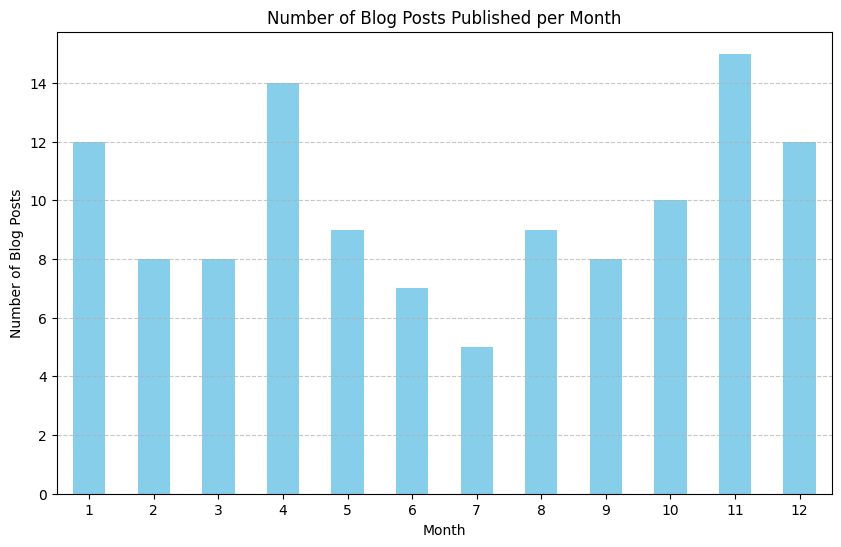

In [ ]:
#month with the most blog posts published
month_activity = blogs['Published At Month'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))
month_activity.plot(kind='bar', color='skyblue')
plt.title('Number of Blog Posts Published per Month')
plt.xlabel('Month')
plt.ylabel('Number of Blog Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# jobs





In [ ]:
jobs.head(30)

,Remote,Experience,Industry,Employment Type,Company Size,Data Science Functions,job_ID
0,NaN,2-5,"{Government,Health,""Financial Services""}",fulltime,50-200,"{""Data modelling"",""Business/Data Analysis""}",ID_VJ43
1,NaN,NaN,NaN,NaN,NaN,NaN,ID_ZNZV
2,True,>5,NaN,fulltime,>200,"{""Data engineering"",""Data modelling""}",ID_PZHM
3,NaN,>5,{Media},fulltime,1-10,"{""Data engineering""}",ID_1PBU
4,NaN,1-2,{Media},fulltime,1-10,"{""Data engineering"",""Data modelling"",""ML Appli...",ID_ZTPN
5,NaN,1-2,NaN,fulltime,50-200,"{""Data modelling"",""Business/Data Analysis"",""Da...",ID_P0AF
6,NaN,2-5,{Insurance},fulltime,50-200,"{""Data engineering"",""Data modelling"",""Business...",ID_7YKR
7,NaN,>5,NaN,fulltime,NaN,NaN,ID_147X
8,NaN,<1,{Location},internship,1-10,"{""Data engineering""}",ID_5ONI
9,NaN,>5,{Health},fulltime,>200,"{""Data engineering"",""Data modelling"",""ML Appli...",ID_SOPZ


In [ ]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Remote                  9 non-null      object
 1   Experience              32 non-null     object
 2   Industry                29 non-null     object
 3   Employment Type         31 non-null     object
 4   Company Size            29 non-null     object
 5   Data Science Functions  29 non-null     object
 6   job_ID                  34 non-null     object
dtypes: object(7)
memory usage: 2.0+ KB


In [ ]:
col = jobs.columns

for c in col:
  print(c)
  print(jobs[c].value_counts())

Remote
Remote
True     8
False    1
Name: count, dtype: int64
Experience
Experience
2-5    14
>5      7
<1      6
1-2     5
Name: count, dtype: int64
Industry
Industry
{"Financial Services"}                      4
{Research}                                  4
{Government,Health,"Financial Services"}    3
{Health}                                    2
{Zindi}                                     2
{Media}                                     2
{Ambassador}                                1
{Scholarship}                               1
{Transportation}                            1
{Logistics}                                 1
{"Artificial Intelligence"}                 1
{Manufacturing,Sales}                       1
{Technology}                                1
{"Financial Services",Banking}              1
{Security}                                  1
{Location}                                  1
{Insurance}                                 1
{"Management Consulting"}                   1
Name

In [ ]:
jobs["job_ID"] = jobs["job_ID"].astype("string")
jobs["job_ID"] = "job_" + jobs["job_ID"]
jobs["job_ID"].unique()

<StringArray>
['job_ID_VJ43', 'job_ID_ZNZV', 'job_ID_PZHM', 'job_ID_1PBU', 'job_ID_ZTPN',
 'job_ID_P0AF', 'job_ID_7YKR', 'job_ID_147X', 'job_ID_5ONI', 'job_ID_SOPZ',
 'job_ID_PFPU', 'job_ID_GYGN', 'job_ID_ZJIX', 'job_ID_QZLH', 'job_ID_128W',
 'job_ID_4V5P', 'job_ID_ZU35', 'job_ID_93OJ', 'job_ID_3CPP', 'job_ID_QM44',
 'job_ID_J62B', 'job_ID_1BD0', 'job_ID_BXB1', 'job_ID_JYTV', 'job_ID_X4AC',
 'job_ID_KP8G', 'job_ID_FTTN', 'job_ID_JJTS', 'job_ID_P6Q8', 'job_ID_T5KV',
 'job_ID_BJ32', 'job_ID_R7BC', 'job_ID_L3KN', 'job_ID_54A8']
Length: 34, dtype: string

In [ ]:
jobs.rename(columns={'job_ID': 'Title'},  inplace = True)

In [ ]:
jobs["Remote"] = jobs["Remote"].replace(to_replace=True, value="1")
jobs["Remote"] = jobs["Remote"].replace(to_replace=False, value="0")
jobs["Remote"].fillna('0', inplace = True)

In [ ]:
#we can assume here that experience is ordinal
jobs["Experience"] = jobs["Experience"].replace(to_replace="<1", value="1")
jobs["Experience"] = jobs["Experience"].replace(to_replace="1-2", value="2")
jobs["Experience"] = jobs["Experience"].replace(to_replace="2-5", value="3")
jobs["Experience"] = jobs["Experience"].replace(to_replace=">5", value="4")
jobs["Experience"].fillna('0', inplace = True)
jobs["Experience"].unique()

array(['3', '0', '4', '2', '1'], dtype=object)

In [ ]:
jobs['Employment Type'].fillna('Not_Employed_Yet', inplace = True)
jobs["Employment Type"] = jobs["Employment Type"].replace(to_replace="fulltime", value="1")
jobs["Employment Type"] = jobs["Employment Type"].replace(to_replace="contract", value="1")
jobs["Employment Type"] = jobs["Employment Type"].replace(to_replace="parttime", value="2")
jobs["Employment Type"] = jobs["Employment Type"].replace(to_replace="internship", value="3")
jobs["Employment Type"] = jobs["Employment Type"].replace(to_replace="Not_Employed_Yet", value="4")
jobs["Employment Type"].unique()

array(['1', '4', '3', '2'], dtype=object)

In [ ]:
jobs["Industry_FS"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Bank"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Loc"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Gov"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Health"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Res"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Amb"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Transp"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Scholar"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Log"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Media"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Manuf"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Sales"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Insur"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Manage"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_AI"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Zindi"] = np.zeros((jobs.shape[0], 1))
jobs["Industry_Tech"] = np.zeros((jobs.shape[0], 1))

In [ ]:
for i in range(len(jobs)):
    if jobs.loc[i, "Industry"] == '{"Financial Services",Banking}':
        jobs.loc[i, "Industry_FS"] = 1
        jobs.loc[i,"Industry_Bank"] = 1

    elif jobs.loc[i,"Industry"] == '{Location}':
        jobs.loc[i,"Industry_Loc"]= 1

    elif jobs.loc[i,"Industry"] == '{Government,Health,"Financial Services"}':
        jobs.loc[i,"Industry_Gov"] = 1
        jobs.loc[i,"Industry_Health"] = 1
        jobs.loc[i,"Industry_FS"] = 1

    elif jobs.loc[i,"Industry"] == '{Research}':
        jobs.loc[i,"Industry_Res"] = 1

    elif jobs.loc[i,"Industry"] == '{Ambassador}':
        jobs.loc[i,"Industry_Amb"] = 1

    elif jobs.loc[i,"Industry"] == '{Transportation}':
        jobs.loc[i,"Industry_Transp"] = 1

    elif jobs.loc[i,"Industry"] == '{Scholarship}':
        jobs.loc[i,"Industry_Scholar"] = 1

    elif jobs.loc[i,"Industry"] == '{Logistics}':
        jobs.loc[i,"Industry_Log"] = 1

    elif jobs.loc[i,"Industry"] == '{Media}':
        jobs.loc[i,"Industry_Media"] = 1

    elif jobs.loc[i,"Industry"] == '{Manufacturing,Sales}':
        jobs.loc[i,"Industry_Manuf"] = 1
        jobs.loc[i,"Industry_Sales"] = 1

    elif jobs.loc[i,"Industry"] == '{"Financial Services"}':
        jobs.loc[i,"Industry_FS"] = 1

    elif jobs.loc[i,"Industry"] == '{Insurance}':
        jobs.loc[i,"Industry_Insur"] = 1

    elif jobs.loc[i,"Industry"] == '{"Management Consulting"}':
        jobs.loc[i,"Industry_Manage"] = 1

    elif jobs.loc[i,"Industry"] == '{"Artificial Intelligence"}':
        jobs.loc[i,"Industry_AI"] = 1

    elif jobs.loc[i,"Industry"] == '{Health}':
        jobs.loc[i,"Industry_Health"] = 1

    elif jobs.loc[i,"Industry"] == '{Zindi}':
        jobs.loc[i,"Industry_Zindi"] = 1

    elif jobs.loc[i,"Industry"] == '{Technology}':
        jobs.loc[i,"Industry_Tech"] = 1

In [ ]:
def logical_or(row):
    return int(any(row))

jobs['Sector_Finance'] = jobs[['Industry_FS', 'Industry_Bank', 'Industry_Insur']].apply(logical_or,axis=1)
jobs['Sector_Government_Public'] = jobs[['Industry_Gov', 'Industry_Scholar']].apply(logical_or,axis=1)
jobs['Sector_Health_Safety'] = jobs[['Industry_Health', 'Industry_Amb']].apply(logical_or,axis=1)
jobs['Sector_Technology_Innovation'] = jobs[['Industry_Tech', 'Industry_AI', 'Industry_Zindi']].apply(logical_or,axis=1)
jobs['Sector_Transportation_Logistics'] = jobs[['Industry_Transp', 'Industry_Log']].apply(logical_or,axis=1)
jobs['Sector_Professional_Services'] = jobs[['Industry_Manage', 'Industry_Sales']].apply(logical_or,axis=1)


In [ ]:
jobs.drop("Industry", inplace =True, axis=1)

In [ ]:
jobs["Company Size"] = jobs["Company Size"].replace(to_replace="1-10", value="1")
jobs["Company Size"] = jobs["Company Size"].replace(to_replace="10-50", value="2")
jobs["Company Size"] = jobs["Company Size"].replace(to_replace="50-200", value="3")
jobs["Company Size"] = jobs["Company Size"].replace(to_replace=">200", value="4")
jobs["Company Size"].fillna('0', inplace = True)

In [ ]:
jobs.drop(["Industry_FS",'Industry_Bank','Industry_Insur','Industry_Gov','Industry_Scholar','Industry_Health','Industry_Amb','Industry_Tech',
           'Industry_AI','Industry_Zindi','Industry_Transp','Industry_Log','Industry_Manage','Industry_Sales'], inplace =True, axis=1)

In [ ]:
def count_functions(cell):
    if isinstance(cell, str):
        functions = cell.strip('{}').split(',')
        return len(functions)
    return 0

jobs['Data Science Functions'] = jobs['Data Science Functions'].apply(count_functions)

In [ ]:
jobs["Remote"] = pd.to_numeric(jobs["Remote"])
jobs["Experience"] = pd.to_numeric(jobs["Experience"])
jobs["Company Size"] = pd.to_numeric(jobs["Company Size"])

In [ ]:
jobs['Sector_Technology_Innovation'].value_counts()

,count
Sector_Technology_Innovation,
0,30
1,4


In [ ]:
display(jobs.head())

,Remote,Experience,Employment Type,Company Size,Data Science Functions,Title,Industry_Loc,Industry_Res,Industry_Media,Industry_Manuf,Sector_Finance,Sector_Government_Public,Sector_Health_Safety,Sector_Technology_Innovation,Sector_Transportation_Logistics,Sector_Professional_Services
0,0,3,1,3,2,job_ID_VJ43,0.0,0.0,0.0,0.0,1,1,1,0,0,0
1,0,0,4,0,0,job_ID_ZNZV,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,1,4,1,4,2,job_ID_PZHM,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,0,4,1,1,1,job_ID_1PBU,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,0,2,1,1,4,job_ID_ZTPN,0.0,0.0,1.0,0.0,0,0,0,0,0,0


In [ ]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Remote                           34 non-null     int64  
 1   Experience                       34 non-null     int64  
 2   Employment Type                  34 non-null     object 
 3   Company Size                     34 non-null     int64  
 4   Data Science Functions           34 non-null     int64  
 5   Title                            34 non-null     string 
 6   Industry_Loc                     34 non-null     float64
 7   Industry_Res                     34 non-null     float64
 8   Industry_Media                   34 non-null     float64
 9   Industry_Manuf                   34 non-null     float64
 10  Sector_Finance                   34 non-null     int64  
 11  Sector_Government_Public         34 non-null     int64  
 12  Sector_Health_Safety    

# Comments

In [ ]:
comments = pd.read_csv('/content/Comments.csv')


In [ ]:
comments.head()

,Disc_ID,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_ONQEAR,ID_CEDNKSVV,16:18:44.841697,1,5,11
1,ID_E0NHSS,ID_CEDNKSVV,17:30:40.566763,1,12,23
2,ID_3XKIOF,ID_CEDNKSVV,13:28:47.950841,1,1,3
3,ID_XCC6W4,ID_CEDNKSVV,18:42:17.362333,1,1,5
4,ID_OIGXGK,ID_CEDNKSVV,18:57:54.540062,1,12,19


In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Disc_ID                  467 non-null    object
 1   User_ID                  467 non-null    object
 2   Created At time          467 non-null    object
 3   Created At Year          467 non-null    int64 
 4   Created At Month         467 non-null    int64 
 5   Created At Day_of_month  467 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 22.0+ KB


In [ ]:
comments.drop(['Created At Year' ,'Created At time'],axis=1,inplace=True)
comments.rename(columns={'Created At Month': 'comment_month'},  inplace = True)
comments.rename(columns={'Created At Day_of_month': 'comment_day'},  inplace = True)

In [ ]:
comments.head()

,Disc_ID,User_ID,comment_month,comment_day
0,ID_ONQEAR,ID_CEDNKSVV,5,11
1,ID_E0NHSS,ID_CEDNKSVV,12,23
2,ID_3XKIOF,ID_CEDNKSVV,1,3
3,ID_XCC6W4,ID_CEDNKSVV,1,5
4,ID_OIGXGK,ID_CEDNKSVV,12,19


In [ ]:
comments = comments.groupby(by=['comment_month' , 'User_ID']).count()
comments

Disc_ID  comment_day
comment_month User_ID                          
1             ID_0SHLNT1X        1            1
              ID_0SXRNUSA        5            5
              ID_0XD46RXY        1            1
              ID_1IXLFBL0        5            5
              ID_1IZ0GTAH        3            3
...                            ...          ...
12            ID_XH4PIFYL        1            1
              ID_YBKATRP2        1            1
              ID_YKMUQUT0        1            1
              ID_YKNL8WNI        1            1
              ID_ZHR6NCSJ        1            1

[199 rows x 2 columns]

In [ ]:
comments.rename(columns={'Disc_ID': 'numberOfComments'},  inplace = True)
comments.drop('comment_day',axis=1,inplace=True)


In [ ]:
comments.head()

numberOfComments
comment_month User_ID                      
1             ID_0SHLNT1X                 1
              ID_0SXRNUSA                 5
              ID_0XD46RXY                 1
              ID_1IXLFBL0                 5
              ID_1IZ0GTAH                 3

# Discussion

In [ ]:
disc.head()

,Competition ID,Personal,Theme,Disc_ID,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,GeneralDiscussion,1,NaN,ID_0BK7TH,ID_AAGFVLHH,19:48:26.862175,1,12,27
1,GeneralDiscussion,1,NaN,ID_ZFJ9J7,ID_0AJGQILU,09:37:52.039526,1,12,20
2,GeneralDiscussion,1,NaN,ID_ME45XX,ID_U90KK6KL,17:50:33.894800,1,2,9
3,ID_45W9,1,NaN,ID_2BG9IX,ID_U90KK6KL,07:57:55.178845,1,2,10
4,GeneralDiscussion,1,NaN,ID_251XVV,ID_F7HIGFHQ,19:56:13.041893,1,12,27


In [ ]:
disc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Competition ID           1439 non-null   object 
 1   Personal                 1439 non-null   int64  
 2   Theme                    159 non-null    float64
 3   Disc_ID                  1439 non-null   object 
 4   User_ID                  1439 non-null   object 
 5   Created At time          1439 non-null   object 
 6   Created At Year          1439 non-null   int64  
 7   Created At Month         1439 non-null   int64  
 8   Created At Day_of_month  1439 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 101.3+ KB


In [ ]:
disc.drop(['Created At Year' ,'Created At time' , 'Theme','Personal','Competition ID'],axis=1,inplace=True)

In [ ]:
disc.rename(columns={'Created At Month': 'disc_month'},  inplace = True)
disc.rename(columns={'Created At Day_of_month': 'disc_day'},  inplace = True)

In [ ]:
disc.head()

,Disc_ID,User_ID,disc_month,disc_day
0,ID_0BK7TH,ID_AAGFVLHH,12,27
1,ID_ZFJ9J7,ID_0AJGQILU,12,20
2,ID_ME45XX,ID_U90KK6KL,2,9
3,ID_2BG9IX,ID_U90KK6KL,2,10
4,ID_251XVV,ID_F7HIGFHQ,12,27


In [ ]:
disc = disc.groupby(by=['disc_month' , 'User_ID']).count()
disc

Disc_ID  disc_day
disc_month User_ID                       
1          ID_02MW81ND        1         1
           ID_06C3AY6T        1         1
           ID_0DB41K6U        1         1
           ID_0SXRNUSA        1         1
           ID_0WLWOMU2        1         1
...                         ...       ...
12         ID_YKMUQUT0        2         2
           ID_YUJ5Z02R        1         1
           ID_ZDAVDH08        3         3
           ID_ZH2JCN29        1         1
           ID_ZZ852GLE        1         1

[1089 rows x 2 columns]

In [ ]:
disc.rename(columns={'Disc_ID': 'numberOfDiscussions'},  inplace = True)
disc.drop('disc_day',axis=1,inplace=True)

In [ ]:
disc

numberOfDiscussions
disc_month User_ID                         
1          ID_02MW81ND                    1
           ID_06C3AY6T                    1
           ID_0DB41K6U                    1
           ID_0SXRNUSA                    1
           ID_0WLWOMU2                    1
...                                     ...
12         ID_YKMUQUT0                    2
           ID_YUJ5Z02R                    1
           ID_ZDAVDH08                    3
           ID_ZH2JCN29                    1
           ID_ZZ852GLE                    1

[1089 rows x 1 columns]

# Competition


In [ ]:
comp.head(10)

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End Time time,End Time Year,End Time Month,End Time Day_of_month,Start Time time,Start Time Year,Start Time Month,Start Time Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,G3F0,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,0Q35,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,EGI9,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28
3,[],[],1.0,0,2,1,[1],[4],[],NaN,NaN,ID_A2FN,12:00:00,2.0,6.0,22.0,12:00:00,2,6,12
4,[],[6],NaN,0,2,0,[],[4],[2],9.0,NaN,ID_X0PD,23:59:00,2.0,5.0,31.0,09:00:00,2,5,27
5,[1],[],9.0,0,2,1,[1],[],[1],9.0,DYYF,ID_381F,16:30:00,2.0,10.0,7.0,08:30:00,2,10,6
6,"[5, 2]",[15],10.0,1,2,0,[3],[],[3],10.0,ZEWU,ID_WWVF,00:00:00,3.0,10.0,29.0,00:00:00,3,9,3
7,[],[],2.0,0,3,1,[1],[3],[],2.0,DYYF,ID_3MK3,09:30:00,1.0,1.0,24.0,09:30:00,1,1,23
8,[1],[6],21.0,0,2,0,[3],[3],[3],21.0,NaN,ID_W9RN,23:59:00,2.0,5.0,3.0,12:00:00,2,5,1
9,[1],[],2.0,0,3,1,[1],[],[1],2.0,X9GR,ID_XEGI,22:59:00,2.0,1.0,11.0,16:00:00,2,12,23


In [ ]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FeatureA                 247 non-null    object 
 1   FeatureB                 247 non-null    object 
 2   FeatureC                 196 non-null    float64
 3   FeatureD                 247 non-null    int64  
 4   FeatureE                 247 non-null    int64  
 5   SecretCode               247 non-null    int64  
 6   FeatureF                 247 non-null    object 
 7   FeatureG                 247 non-null    object 
 8   FeatureH                 247 non-null    object 
 9   FeatureI                 186 non-null    float64
 10  Country_ID               121 non-null    object 
 11  Comp_ID                  247 non-null    object 
 12  End Time time            224 non-null    object 
 13  End Time Year            224 non-null    float64
 14  End Time Month           2

In [ ]:
col = comp.columns

for c in col:
  print(c)
  print(comp[c].unique())

FeatureA
['[2, 4]' '[1]' '[]' '[5, 2]' '[2]' '[3, 2]' '[3]' '[6, 1]' '[6]' '[1, 6]'
 '[1, 5, 4]' '[4, 7, 2]' '[8]' '[1, 3]' '[2, 3]' '[5]' '[4]' '[7, 3, 2]'
 '[4, 2]' '[2, 10, 3]' '[1, 4, 5]' '[7]' '[2, 4, 5]' '[3, 7]' '[5, 4]'
 '[1, 7]' '[1, 9]' '[2, 7]']
FeatureB
['[14]' '[]' '[9]' '[6]' '[15]' '[10]' '[12]' '[16]' '[14, 8]' '[5]' '[7]'
 '[5, 7]' '[1]' '[14, 7]' '[6, 5]' '[7, 5, 14]' '[12, 16]' '[2]' '[5, 6]'
 '[7, 5]']
FeatureC
[15.  3.  2.  1. nan  9. 10. 21. 25.  6.  7.  4. 22. 11. 18. 17. 23. 20.
 31. 29.  5. 12. 27.  8. 34. 35. 37. 36. 13. 28. 30. 32. 33. 16. 26. 14.
 19. 24.]
FeatureD
[0 1]
FeatureE
[2 3 1]
SecretCode
[1 0]
FeatureF
['[3]' '[1]' '[1, 5]' '[]' '[9]' '[7]' '[2]' '[4]' '[2, 3]' '[1, 11]'
 '[3, 2]' '[8]' '[2, 11]' '[10]' '[2, 8]' '[1, 3]' '[1, 12]' '[2, 13]'
 '[6]' '[3, 1]' '[2, 11, 14]' '[2, 1]' '[15]']
FeatureG
['[]' '[5]' '[4]' '[3]' '[5, 3, 4]']
FeatureH
['[]' '[1]' '[2]' '[3]' '[9]' '[7]' '[4]' '[3, 2]' '[8]' '[10]' '[2, 8]'
 '[1, 3]' '[2, 3]' '[6]' '[3, 1]' '

In [ ]:
comp.rename(columns={'End Time Year': 'comp_end_year'},  inplace = True)
comp.rename(columns={'End Time Month': 'comp_end_month'},  inplace = True)
comp.rename(columns={'End Time Day_of_month': 'comp_end_day'},  inplace = True)
comp.rename(columns={'Start Time Year': 'comp_start_year'},  inplace = True)
comp.rename(columns={'Start Time Month': 'comp_start_month'},  inplace = True)
comp.rename(columns={'Start Time Day_of_month': 'comp_start_day'},  inplace = True)

In [ ]:
comp.drop(['End Time time' ,'Start Time time' ,'FeatureA','FeatureB','FeatureC','FeatureD','FeatureE','SecretCode','FeatureF','FeatureG','FeatureH','FeatureI','Country_ID'],axis=1,inplace=True)

In [ ]:
from datetime import datetime

today = datetime(2023, 1, 1)

def map_year(code):
    if pd.isna(code):
        return 2024
    return {1: 2023, 2: 2022, 3: 2021, 4: 2020, 5: 2019}.get(code, 2024)

def safe_date(year, month, day):
    if pd.isna(year):
        year = today.year
    if pd.isna(month):
        month = today.month
    if pd.isna(day):
        day = today.day
    if month == 2 and day > 28:
        day = 28
    try:
        return pd.to_datetime(f"{int(year)}-{int(month)}-{int(day)}")
    except ValueError:
        return pd.NaT

comp['Mapped Start Year'] = comp['comp_start_year'].apply(map_year)
comp['Mapped End Year'] = comp['comp_end_year'].apply(map_year)
comp['Corrected Start Date'] = comp.apply(lambda row: safe_date(row['Mapped Start Year'], row['comp_start_month'], row['comp_start_day']), axis=1)
comp['Corrected End Date'] = comp.apply(lambda row: safe_date(row['Mapped End Year'], row['comp_end_month'], row['comp_end_day']), axis=1)
comp['Duration (Days)'] = abs((comp['Corrected End Date'] - comp['Corrected Start Date'])).dt.days


In [ ]:
comp['Duration (Days)'].unique()

array([   0,   14,   42,   10,    4,    1,   56,    2,  346,   66,  281,
          3,   98,    9,    7,  487,  268,    5,  701,  274,   79,   91,
        299,  533,   52,   24,   22,   15,   11,   16,  264,  298,   20,
          6,   89,  761,   87,   78,   83,   31,  248,  518,  328,   34,
        550,  494,   72,  319,   71,  460,  461, 1351,   69,   60,  474,
         93,  486,   21,   64,   82,  251,   95,   61, 1696, 1403,    8,
        277,  456,  272,  102,  171,   97,  241,   33,  544,   28,  636,
         26, 1062, 1372,   68,   37,  496,   19,  530,  109,   29,  246,
         46,   94,  294,  520, 1369, 1056, 1291,   32, 1091,  482, 1077,
         88,   96,  477,  844, 1049,  495,  438,  271, 1177,  357,   65,
        946,   84,  338,   30])

In [ ]:
comp.drop(['comp_start_year','comp_start_month','comp_start_day','comp_end_year','comp_end_month','comp_end_day','Mapped Start Year','Mapped End Year','Corrected Start Date','Corrected End Date'],axis=1,inplace=True)

In [ ]:
col = comp.columns

for c in col:
  print(c)
  print(comp[c].isnull().sum())

Comp_ID
0
Duration (Days)
0


In [ ]:
comp.tail(20)

,Comp_ID,Duration (Days)
227,ID_9QGT,7
228,ID_FM77,65
229,ID_UB7R,91
230,ID_7YDI,2
231,ID_PNHR,946
232,ID_AS79,20
233,ID_M3G0,1351
234,ID_8DGC,2
235,ID_9TS1,1
236,ID_FZ48,61


# Competition Particpation


In [ ]:
cp.head()

,Competition ID,Participant Type,Successful Submission Count,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20
2,ID_I9BN,1,NaN,ID_40G01FGV,12:06:55.884320,1,12,17
3,ID_PDKH,1,count 10,ID_40G01FGV,11:24:04.239058,1,12,6
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26


In [ ]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8385 entries, 0 to 8384
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Competition ID               8385 non-null   object
 1   Participant Type             8385 non-null   int64 
 2   Successful Submission Count  1449 non-null   object
 3   User_ID                      8385 non-null   object
 4   Created At time              8385 non-null   object
 5   Created At Year              8385 non-null   int64 
 6   Created At Month             8385 non-null   int64 
 7   Created At Day_of_month      8385 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 524.2+ KB


In [ ]:
col = cp.columns

for c in col:
  print(c)
  print(cp[c].nunique())

Competition ID
131
Participant Type
1
Successful Submission Count
8
User_ID
5245
Created At time
8385
Created At Year
1
Created At Month
7
Created At Day_of_month
31


In [ ]:
cp.drop(['Participant Type' ,'Created At time','Created At Year'],axis=1,inplace=True)

In [ ]:
cp.rename(columns={'Competition ID': 'Comp_ID'},  inplace = True)
cp.rename(columns={'Created At Month': 'cp_month'},  inplace = True)
cp.rename(columns={'Created At Day_of_month': 'cp_day'},  inplace = True)

In [ ]:
cp['Successful Submission Count'] = cp['Successful Submission Count'].str.replace('count', '').str.strip()
cp['Successful Submission Count'] = cp['Successful Submission Count'].fillna('0').astype(int)

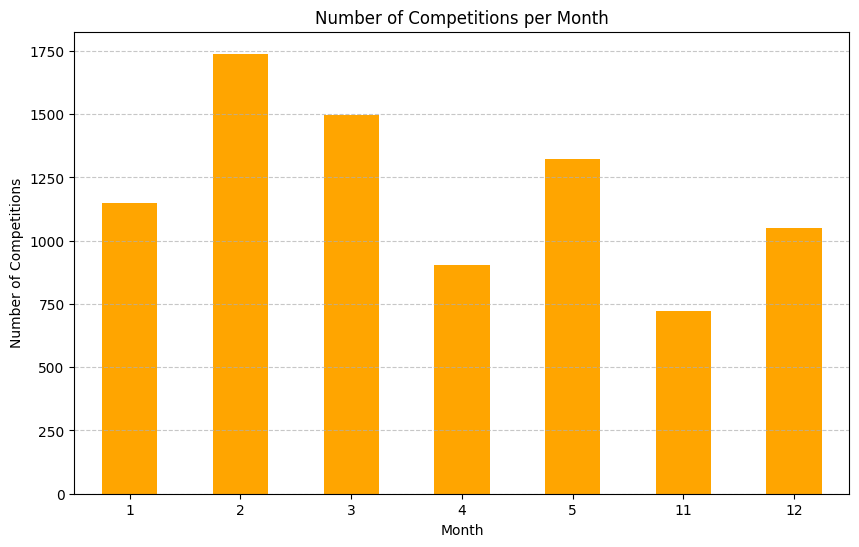

In [ ]:
#Most Active Month in Terms of Competitions

month_competitions = cp['cp_month'].value_counts().sort_index()

# Plotting the number of competitions per month
plt.figure(figsize=(10, 6))
month_competitions.plot(kind='bar', color='orange')
plt.title('Number of Competitions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Competitions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

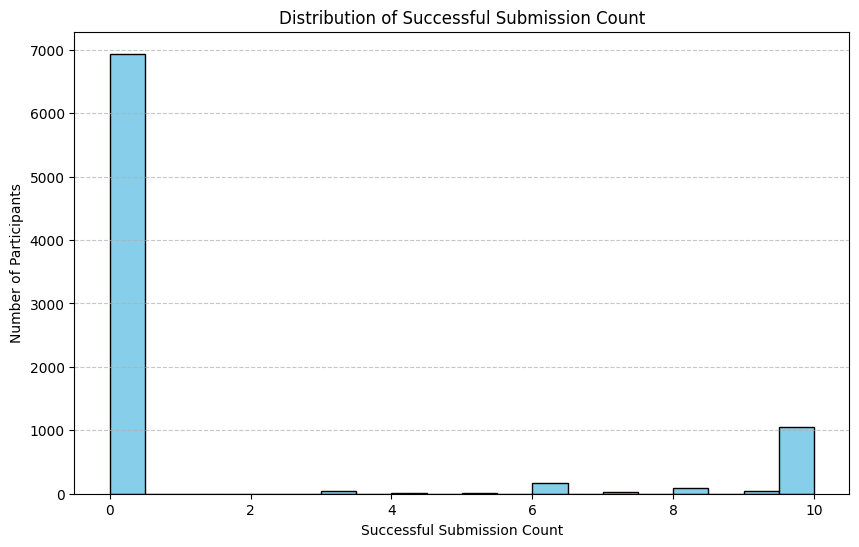

In [ ]:
#Histogram for Successful Submission Count

submission_counts = cp['Successful Submission Count'].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(submission_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Successful Submission Count')
plt.xlabel('Successful Submission Count')
plt.ylabel('Number of Participants')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# merge between useractivity and jobs

In [ ]:
useract_jobs = pd.merge(useract, jobs, how="left", on=['Title'])

In [ ]:
col = useract_jobs.columns

for c in col:
  print(c)
  print(useract_jobs[c].isnull().sum())

User_ID
0
Title
0
useract_month
0
useract_day
0
isblog
0
iscomp
0
isjob
0
Remote
315800
Experience
315800
Employment Type
315800
Company Size
315800
Data Science Functions
315800
Industry_Loc
315800
Industry_Res
315800
Industry_Media
315800
Industry_Manuf
315800
Sector_Finance
315800
Sector_Government_Public
315800
Sector_Health_Safety
315800
Sector_Technology_Innovation
315800
Sector_Transportation_Logistics
315800
Sector_Professional_Services
315800


In [ ]:
useract_jobs

,User_ID,Title,useract_month,useract_day,isblog,iscomp,isjob,Remote,Experience,Employment Type,...,Industry_Loc,Industry_Res,Industry_Media,Industry_Manuf,Sector_Finance,Sector_Government_Public,Sector_Health_Safety,Sector_Technology_Innovation,Sector_Transportation_Logistics,Sector_Professional_Services
0,ID_RT43AK77,comp_ID_IV5D,11,22,0,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317287,ID_Z759BCS3,job_ID_5ONI,11,14,0,0,1,0.0,1.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317288,ID_WNJMADF8,job_ID_5ONI,11,14,0,0,1,0.0,1.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317289,ID_7NBY9MV2,job_ID_5ONI,11,20,0,0,1,0.0,1.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317290,ID_LHPJJSOK,job_ID_5ONI,11,14,0,0,1,0.0,1.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
useract_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   User_ID                          317292 non-null  object 
 1   Title                            317292 non-null  object 
 2   useract_month                    317292 non-null  int64  
 3   useract_day                      317292 non-null  int64  
 4   isblog                           317292 non-null  int64  
 5   iscomp                           317292 non-null  int64  
 6   isjob                            317292 non-null  int64  
 7   Remote                           1492 non-null    float64
 8   Experience                       1492 non-null    float64
 9   Employment Type                  1492 non-null    object 
 10  Company Size                     1492 non-null    float64
 11  Data Science Functions           1492 non-null    float64
 12  In

In [ ]:
useract_jobs.fillna(0 ,inplace=True)

# merge between useractivity with blogs


In [ ]:
useract_jobs_blogs = pd.merge(useract_jobs, blogs, how="left", on=['Title'])

In [ ]:
useract_jobs_blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   User_ID                          317292 non-null  object 
 1   Title                            317292 non-null  object 
 2   useract_month                    317292 non-null  int64  
 3   useract_day                      317292 non-null  int64  
 4   isblog                           317292 non-null  int64  
 5   iscomp                           317292 non-null  int64  
 6   isjob                            317292 non-null  int64  
 7   Remote                           317292 non-null  float64
 8   Experience                       317292 non-null  float64
 9   Employment Type                  317292 non-null  object 
 10  Company Size                     317292 non-null  float64
 11  Data Science Functions           317292 non-null  float64
 12  In

In [ ]:
#fill the nulls
useract_jobs_blogs.fillna(0, inplace=True)

In [ ]:
useract_jobs_blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   User_ID                          317292 non-null  object 
 1   Title                            317292 non-null  object 
 2   useract_month                    317292 non-null  int64  
 3   useract_day                      317292 non-null  int64  
 4   isblog                           317292 non-null  int64  
 5   iscomp                           317292 non-null  int64  
 6   isjob                            317292 non-null  int64  
 7   Remote                           317292 non-null  float64
 8   Experience                       317292 non-null  float64
 9   Employment Type                  317292 non-null  object 
 10  Company Size                     317292 non-null  float64
 11  Data Science Functions           317292 non-null  float64
 12  In

In [ ]:
useract_jobs_blogs['Employment Type'] = useract_jobs_blogs['Employment Type'].astype("int64")

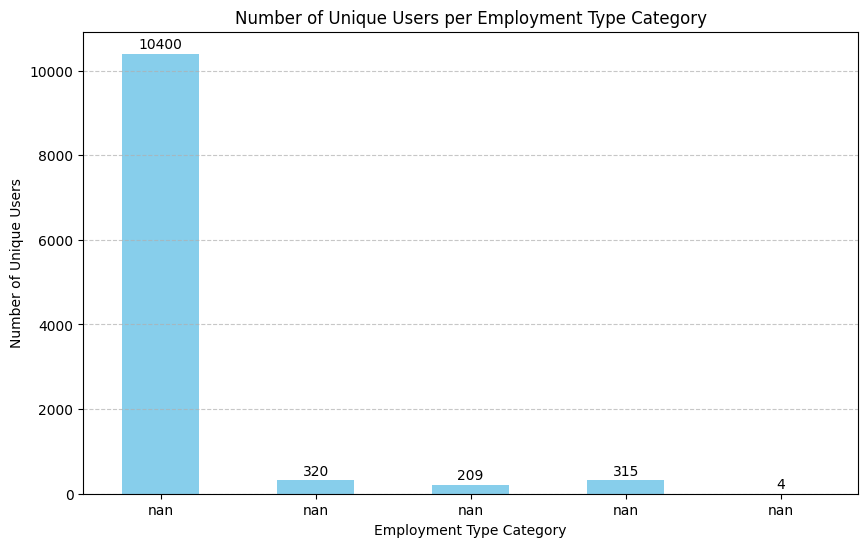

In [ ]:
#count the number of unique users for each employment category

employment_type_mapping = {
    "1": "Full-time/Contract",
    "2": "Part-time",
    "3": "Internship",
    "4": "Not Employed Yet"
}

# Count the number of unique users per Employment Type category
employment_counts = useract_jobs_blogs.groupby('Employment Type')['User_ID'].nunique()

# Convert index to categorical names based on mapping
employment_counts.index = employment_counts.index.map(employment_type_mapping)

# Plotting the results
plt.figure(figsize=(10, 6))
employment_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Users per Employment Type Category')
plt.xlabel('Employment Type Category')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i, count in enumerate(employment_counts):
    plt.text(i, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

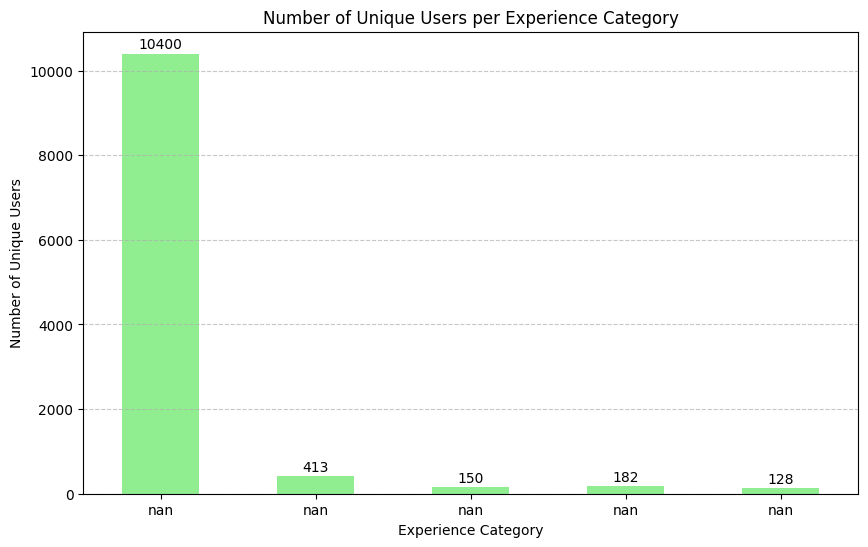

In [ ]:
#count the number of unique users for each experience category
experience_mapping = {
    "0": "No Experience",
    "1": "< 1 Year",
    "2": "1-2 Years",
    "3": "2-5 Years",
    "4": "> 5 Years"
}

# Count the number of unique users per Experience category
experience_counts = useract_jobs_blogs.groupby('Experience')['User_ID'].nunique()

# Convert index to categorical names based on mapping
experience_counts.index = experience_counts.index.map(experience_mapping)

# Plotting the results
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Unique Users per Experience Category')
plt.xlabel('Experience Category')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i, count in enumerate(experience_counts):
    plt.text(i, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

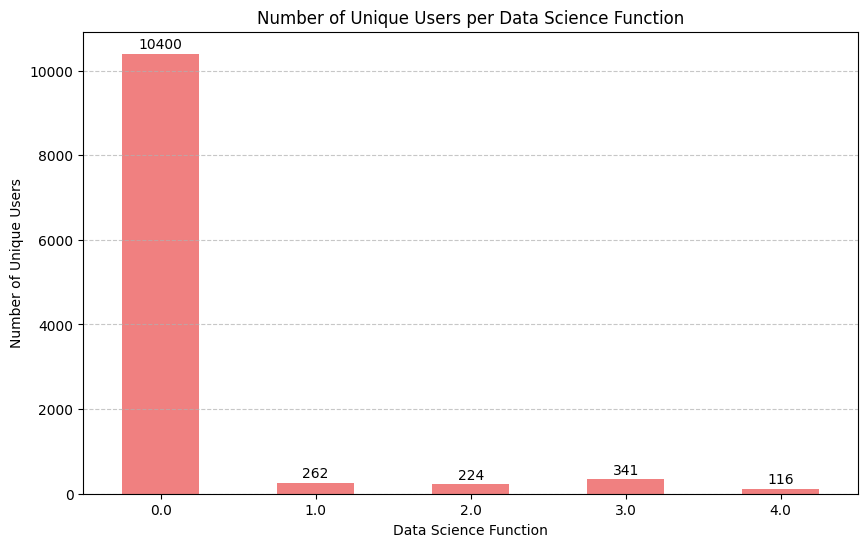

In [ ]:
# Assuming 'Data Science Functions' column has categorical values
data_science_function_counts = useract_jobs_blogs.groupby('Data Science Functions')['User_ID'].nunique()

# Plotting the results for Data Science Functions
plt.figure(figsize=(10, 6))
data_science_function_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Unique Users per Data Science Function')
plt.xlabel('Data Science Function')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i, count in enumerate(data_science_function_counts):
    plt.text(i, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


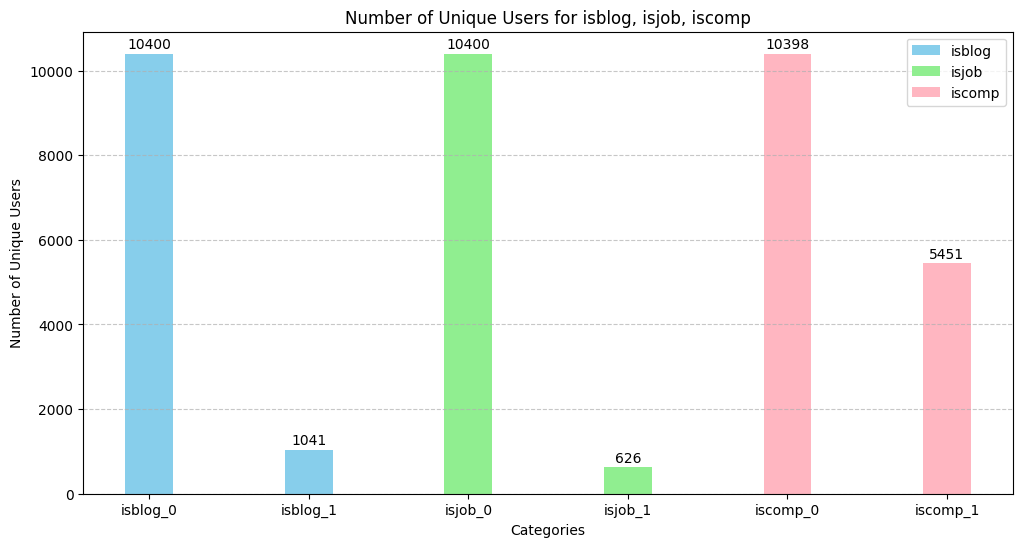

In [ ]:
# Count the number of unique users per category for isblog, isjob, and iscomp
isblog_counts = useract_jobs_blogs.groupby('isblog')['User_ID'].nunique()
isjob_counts = useract_jobs_blogs.groupby('isjob')['User_ID'].nunique()
iscomp_counts = useract_jobs_blogs.groupby('iscomp')['User_ID'].nunique()

# Plotting the results for isblog, isjob, and iscomp in a single plot
plt.figure(figsize=(12, 6))

# isblog bar
plt.bar(['isblog_0', 'isblog_1'], isblog_counts, color='skyblue', width=0.3, label='isblog')

# isjob bar (shifted for better visualization)
plt.bar(['isjob_0', 'isjob_1'], isjob_counts, color='lightgreen', width=0.3, label='isjob')

# iscomp bar (shifted for better visualization)
plt.bar(['iscomp_0', 'iscomp_1'], iscomp_counts, color='lightpink', width=0.3, label='iscomp')

plt.title('Number of Unique Users for isblog, isjob, iscomp')
plt.xlabel('Categories')
plt.ylabel('Number of Unique Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Add text labels for each bar
for i, count in enumerate(isblog_counts):
    plt.text(i, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

for i, count in enumerate(isjob_counts):
    plt.text(i + 2, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

for i, count in enumerate(iscomp_counts):
    plt.text(i + 4, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


# merge between competition and competition participations

In [ ]:
comp_cp = pd.merge(cp, comp, how="left", on=['Comp_ID'])

In [ ]:
comp_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8385 entries, 0 to 8384
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Comp_ID                      8385 non-null   object
 1   Successful Submission Count  8385 non-null   int64 
 2   User_ID                      8385 non-null   object
 3   cp_month                     8385 non-null   int64 
 4   cp_day                       8385 non-null   int64 
 5   Duration (Days)              8385 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 393.2+ KB


In [ ]:
comp_cp.head()

,Comp_ID,Successful Submission Count,User_ID,cp_month,cp_day,Duration (Days)
0,ID_WPP3,0,ID_40G01FGV,11,20,456
1,ID_ZN92,0,ID_40G01FGV,11,20,88
2,ID_I9BN,0,ID_40G01FGV,12,17,274
3,ID_PDKH,10,ID_40G01FGV,12,6,264
4,ID_CFN7,0,ID_P33ABQX5,5,26,487


In [ ]:
comp_cp["Comp_ID"] = "comp_" + comp_cp["Comp_ID"]
comp_cp["Comp_ID"].unique()

array(['comp_ID_WPP3', 'comp_ID_ZN92', 'comp_ID_I9BN', 'comp_ID_PDKH',
       'comp_ID_CFN7', 'comp_ID_V0FX', 'comp_ID_6E1C', 'comp_ID_N5MO',
       'comp_ID_AL6C', 'comp_ID_OP12', 'comp_ID_BARV', 'comp_ID_9TS1',
       'comp_ID_X2AS', 'comp_ID_8BH9', 'comp_ID_GVGW', 'comp_ID_JRC2',
       'comp_ID_F5JG', 'comp_ID_FCRM', 'comp_ID_WZ0H', 'comp_ID_1CTF',
       'comp_ID_51ZG', 'comp_ID_F7QD', 'comp_ID_PJZC', 'comp_ID_WOVD',
       'comp_ID_20XL', 'comp_ID_J883', 'comp_ID_BXIL', 'comp_ID_L3EB',
       'comp_ID_UB7R', 'comp_ID_2MIC', 'comp_ID_UILN', 'comp_ID_1261',
       'comp_ID_XOAY', 'comp_ID_1ZWS', 'comp_ID_53GM', 'comp_ID_GAV9',
       'comp_ID_540G', 'comp_ID_IQLI', 'comp_ID_GR92', 'comp_ID_PB3Q',
       'comp_ID_8B8I', 'comp_ID_IVH9', 'comp_ID_OAR6', 'comp_ID_5KD8',
       'comp_ID_528W', 'comp_ID_0D02', 'comp_ID_0W7H', 'comp_ID_L9R0',
       'comp_ID_7CF2', 'comp_ID_NKJR', 'comp_ID_YDM3', 'comp_ID_KU2G',
       'comp_ID_MN35', 'comp_ID_6IDY', 'comp_ID_XZ71', 'comp_ID_56O8',
      

# merge between useractivity  with comp_cp

In [ ]:
df_merge = pd.merge(useract_jobs_blogs, comp_cp, how='left', left_on=['User_ID', 'Title'], right_on=['User_ID', 'Comp_ID'])

In [ ]:
df_merge.head()

,User_ID,Title,useract_month,useract_day,isblog,iscomp,isjob,Remote,Experience,Employment Type,...,Sector_Technology_Innovation,Sector_Transportation_Logistics,Sector_Professional_Services,Published At Month,Published At Day_of_month,Comp_ID,Successful Submission Count,cp_month,cp_day,Duration (Days)
0,ID_RT43AK77,comp_ID_IV5D,11,22,0,1,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0
1,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0
2,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0
3,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0
4,ID_RT43AK77,comp_ID_IV5D,11,23,0,1,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   User_ID                          317292 non-null  object 
 1   Title                            317292 non-null  object 
 2   useract_month                    317292 non-null  int64  
 3   useract_day                      317292 non-null  int64  
 4   isblog                           317292 non-null  int64  
 5   iscomp                           317292 non-null  int64  
 6   isjob                            317292 non-null  int64  
 7   Remote                           317292 non-null  float64
 8   Experience                       317292 non-null  float64
 9   Employment Type                  317292 non-null  int64  
 10  Company Size                     317292 non-null  float64
 11  Data Science Functions           317292 non-null  float64
 12  In

In [ ]:
df_merge.fillna(0, inplace=True)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   User_ID                          317292 non-null  object 
 1   Title                            317292 non-null  object 
 2   useract_month                    317292 non-null  int64  
 3   useract_day                      317292 non-null  int64  
 4   isblog                           317292 non-null  int64  
 5   iscomp                           317292 non-null  int64  
 6   isjob                            317292 non-null  int64  
 7   Remote                           317292 non-null  float64
 8   Experience                       317292 non-null  float64
 9   Employment Type                  317292 non-null  int64  
 10  Company Size                     317292 non-null  float64
 11  Data Science Functions           317292 non-null  float64
 12  In

In [ ]:
df_merge.drop('Title',axis=1,inplace=True)

# merge useract with discussion and comments

In [ ]:
df_final = pd.merge(df_merge, comments, how="left",
                    left_on=['useract_month', 'User_ID'],
                    right_on=['comment_month', 'User_ID'])

df_final.head()

,User_ID,useract_month,useract_day,isblog,iscomp,isjob,Remote,Experience,Employment Type,Company Size,...,Sector_Transportation_Logistics,Sector_Professional_Services,Published At Month,Published At Day_of_month,Comp_ID,Successful Submission Count,cp_month,cp_day,Duration (Days),numberOfComments
0,ID_RT43AK77,11,22,0,1,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0,NaN
1,ID_RT43AK77,11,23,0,1,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0,NaN
2,ID_RT43AK77,11,23,0,1,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0,NaN
3,ID_RT43AK77,11,23,0,1,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0,NaN
4,ID_RT43AK77,11,23,0,1,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,comp_ID_IV5D,0.0,11.0,22.0,1.0,NaN


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   User_ID                          317292 non-null  object 
 1   useract_month                    317292 non-null  int64  
 2   useract_day                      317292 non-null  int64  
 3   isblog                           317292 non-null  int64  
 4   iscomp                           317292 non-null  int64  
 5   isjob                            317292 non-null  int64  
 6   Remote                           317292 non-null  float64
 7   Experience                       317292 non-null  float64
 8   Employment Type                  317292 non-null  int64  
 9   Company Size                     317292 non-null  float64
 10  Data Science Functions           317292 non-null  float64
 11  Industry_Loc                     317292 non-null  float64
 12  In

In [ ]:
df_final.fillna(0,inplace=True)

In [ ]:
df_final = pd.merge(df_final, disc, how="left", left_on=['useract_month','User_ID'] , right_on=['disc_month','User_ID'])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   User_ID                          317292 non-null  object 
 1   useract_month                    317292 non-null  int64  
 2   useract_day                      317292 non-null  int64  
 3   isblog                           317292 non-null  int64  
 4   iscomp                           317292 non-null  int64  
 5   isjob                            317292 non-null  int64  
 6   Remote                           317292 non-null  float64
 7   Experience                       317292 non-null  float64
 8   Employment Type                  317292 non-null  int64  
 9   Company Size                     317292 non-null  float64
 10  Data Science Functions           317292 non-null  float64
 11  Industry_Loc                     317292 non-null  float64
 12  In

In [ ]:
df_final.fillna(0,inplace=True)

# apply aggragations

In [ ]:
# Step 1: Compute the total activities
total_activities = df_final.groupby(['User_ID', 'useract_month']).size().reset_index(name='total_activity')

# Step 2: Merge this back into the original dataframe to include the total_activity column
df_final = pd.merge(df_final, total_activities, on=['User_ID', 'useract_month'], how='left')

In [ ]:
aggregations = {
    'isblog': 'sum',
    'iscomp': 'sum',
    'isjob': 'sum',
}

# Apply the aggregation method except for the columns to sum which are handled separately
for col in df_final.columns:
    if col not in ['isblog', 'iscomp', 'isjob',  'useract_month', 'User_ID', 'Comp_ID']:
        aggregations[col] = 'max'

# Group by and aggregate
df_agg = df_final.groupby(['useract_month', 'User_ID', 'Comp_ID']).agg(aggregations)

# Reset the index if you need a flat dataframe
df_agg = df_agg.reset_index()

In [ ]:
#momken hena nestakhdm el hagat deh ll visualisation
df_agg.drop(['cp_month','cp_day','useract_day' ,'Published At Month','Published At Day_of_month'],axis=1,inplace=True)

In [ ]:
df_agg.head(30)

,useract_month,User_ID,Comp_ID,isblog,iscomp,isjob,Remote,Experience,Employment Type,Company Size,...,Sector_Government_Public,Sector_Health_Safety,Sector_Technology_Innovation,Sector_Transportation_Logistics,Sector_Professional_Services,Successful Submission Count,Duration (Days),numberOfComments,numberOfDiscussions,total_activity
0,1,ID_004UKSJV,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,ID_008D2J6C,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,1,ID_00ETFE7J,0,1,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,1,ID_00RKDLAX,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,ID_015M2NE1,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,1,ID_0190Y8K7,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1,ID_01G0BFLB,0,0,0,3,1.0,1.0,3,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39
7,1,ID_02D2P483,0,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,1,ID_02MW81ND,0,0,1,3,0.0,1.0,2,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,78
9,1,ID_02MW81ND,comp_ID_I9BN,0,8,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,274.0,0.0,1.0,78


## visualization

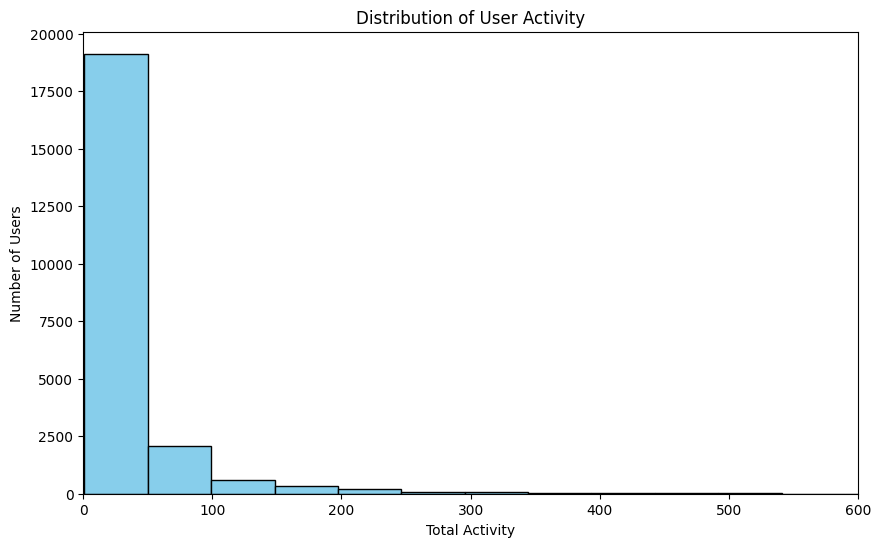

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_agg['total_activity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Total Activity')
plt.ylabel('Number of Users')
plt.title('Distribution of User Activity')
plt.xlim(0, 600)
plt.show()


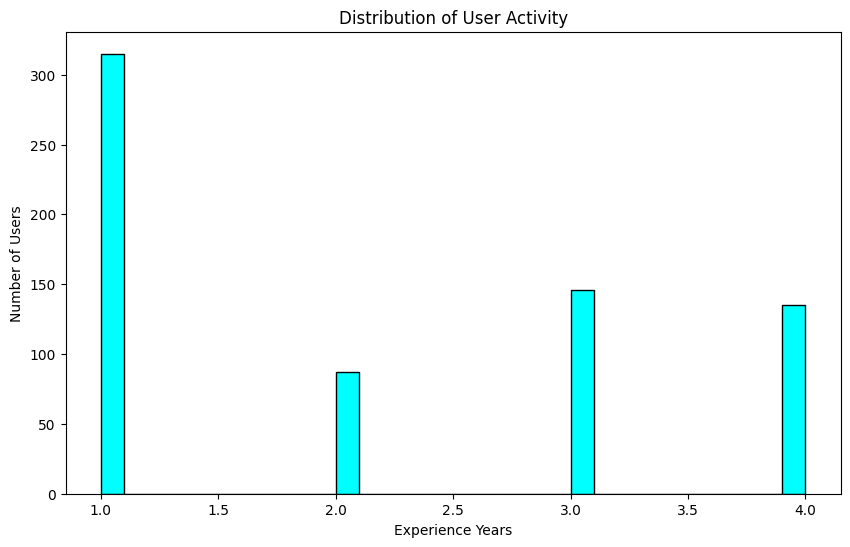

In [ ]:
df_agg_filtered = df_agg[df_agg['Experience'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(df_agg_filtered['Experience'], bins=30, color='cyan', edgecolor='black')
plt.xlabel('Experience Years')
plt.ylabel('Number of Users')
plt.title('Distribution of User Activity')
plt.show()

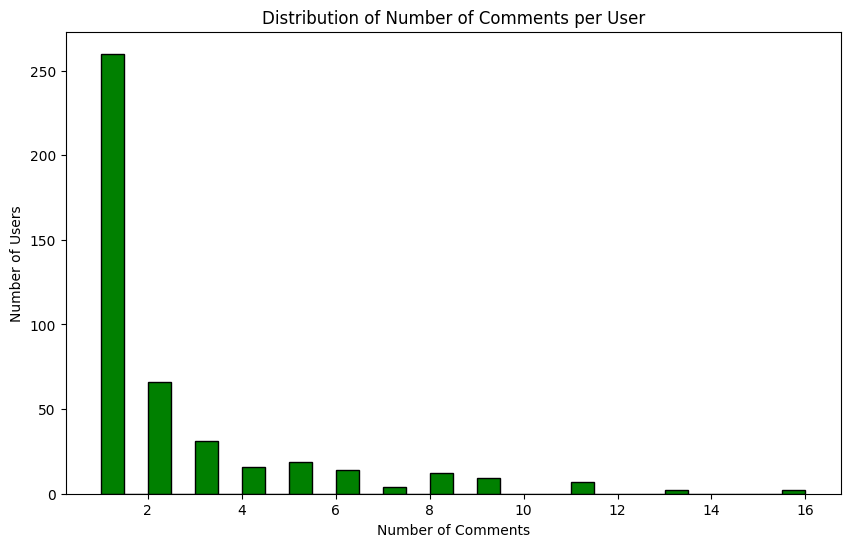

In [ ]:
df_agg_filtered = df_agg[df_agg['numberOfComments'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(df_agg_filtered['numberOfComments'], bins=30, color='green', edgecolor='black')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Comments per User')
plt.show()

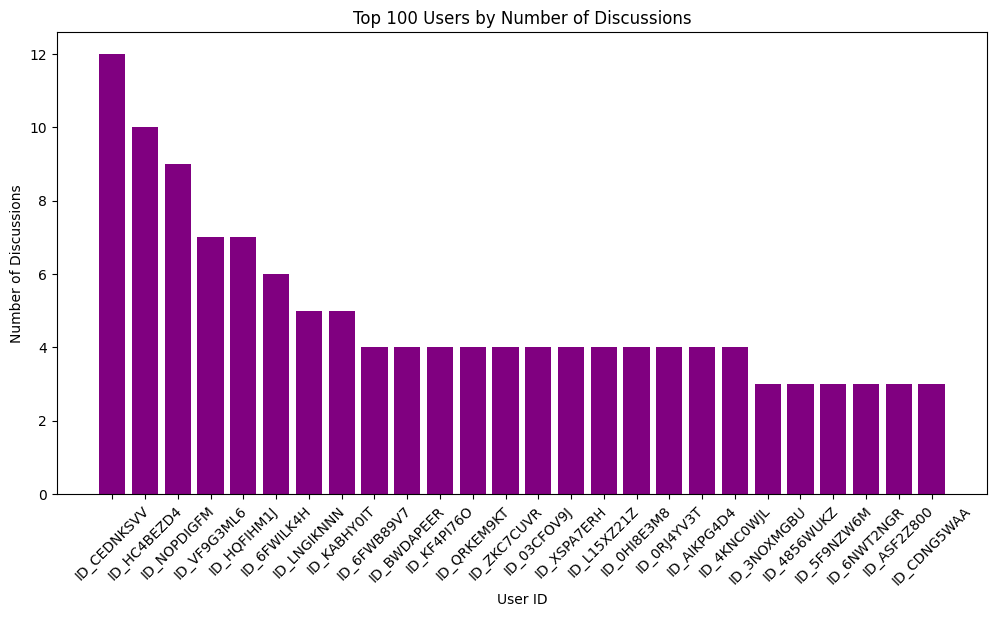

In [ ]:
top_n = 100
top_users = df_agg.nlargest(top_n, 'numberOfDiscussions')
plt.figure(figsize=(12, 6))
plt.bar(top_users['User_ID'], top_users['numberOfDiscussions'], color='purple')
plt.xlabel('User ID')
plt.ylabel('Number of Discussions')
plt.title(f'Top {top_n} Users by Number of Discussions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
activity_counts = useract[['isblog', 'iscomp', 'isjob']].sum()
activity_percentages = activity_counts / activity_counts.sum() * 100
activity_percentages

,0
isblog,4.539368
iscomp,92.963310
isjob,2.497322


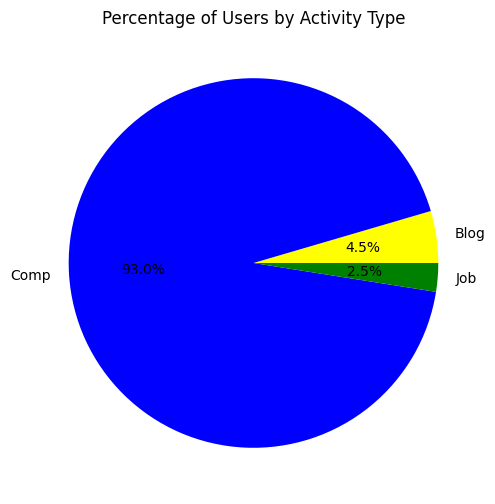

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(activity_percentages, labels=['Blog', 'Comp', 'Job'], autopct='%1.1f%%', colors=['yellow', 'blue', 'green'])
plt.title('Percentage of Users by Activity Type')
plt.show()

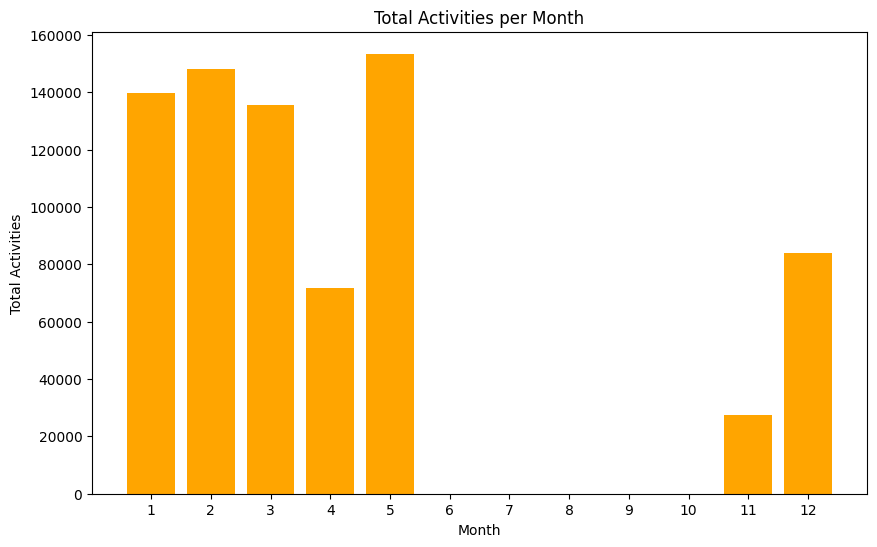

In [ ]:
monthly_activities = df_agg.groupby('useract_month')['total_activity'].sum().reset_index()
df_agg['total_activity'] = df_agg[['isblog', 'iscomp', 'isjob']].sum(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(monthly_activities['useract_month'], monthly_activities['total_activity'], color='orange')
plt.xlabel('Month')
plt.ylabel('Total Activities')
plt.title('Total Activities per Month')
plt.xticks(ticks=range(1, 13))
plt.show()

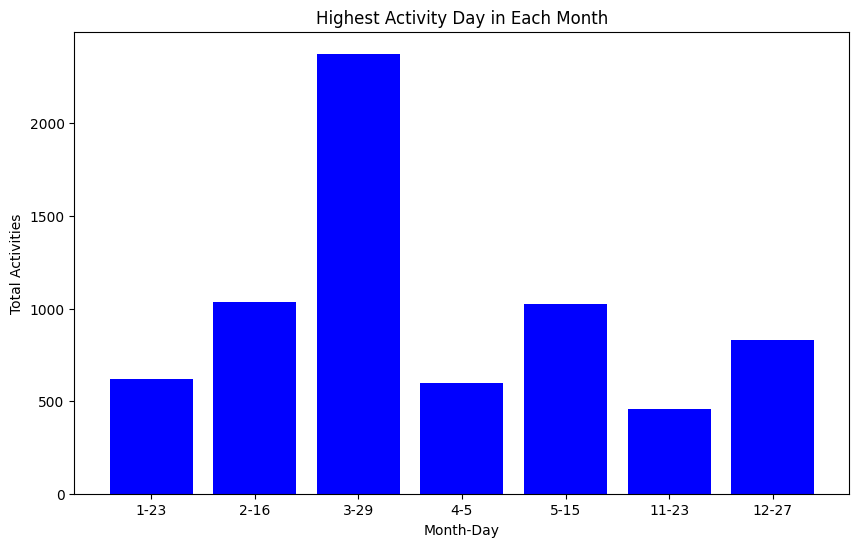

In [ ]:
df_final['total_activity'] = df_final[['isblog', 'iscomp', 'isjob']].sum(axis=1)

monthly_day_activities = df_final.groupby(['useract_month', 'useract_day'])['total_activity'].sum().reset_index()

max_day_per_month = monthly_day_activities.loc[monthly_day_activities.groupby('useract_month')['total_activity'].idxmax()]

plt.figure(figsize=(10, 6))
plt.bar(max_day_per_month['useract_month'].astype(str) + '-' + max_day_per_month['useract_day'].astype(str),
        max_day_per_month['total_activity'], color='blue')
plt.xlabel('Month-Day')
plt.ylabel('Total Activities')
plt.title('Highest Activity Day in Each Month')
plt.show()

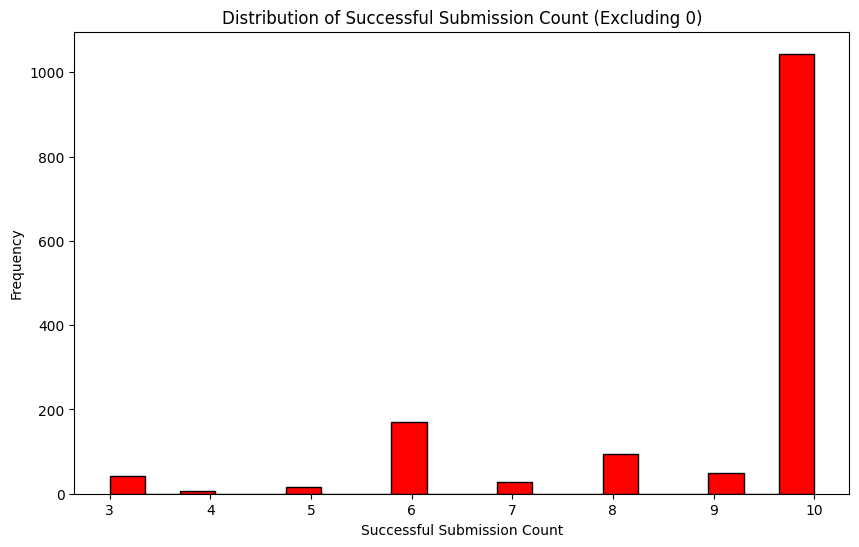

In [ ]:
filtered_cp = cp[cp['Successful Submission Count'] > 0]
plt.figure(figsize=(10, 6))
plt.hist(filtered_cp['Successful Submission Count'], bins=20, color='red', edgecolor='black')
plt.xlabel('Successful Submission Count')
plt.ylabel('Frequency')
plt.title('Distribution of Successful Submission Count (Excluding 0)')
plt.show()

# create Target variable

In [ ]:
df = df_agg.sort_values(by=['User_ID', 'useract_month'])
df['active_next_month'] = 0

months = sorted(df['useract_month'].unique())

# List to hold new rows
new_rows = []

# Iterate through each month except the last one
for i in range(len(months) - 1):
    current_month = months[i]
    next_month = months[i + 1]

    current_users = df[df['useract_month'] == current_month]['User_ID'].unique()
    next_users = df[df['useract_month'] == next_month]['User_ID'].unique()
    active_users = set(current_users).intersection(set(next_users))
    df.loc[(df['useract_month'] == current_month) & (df['User_ID'].isin(active_users)), 'active_next_month'] = 1

    inactive_users = set(current_users) - set(next_users)

    # Duplicate these users into the next month with all other columns as zeros
    for user in inactive_users:
        row = df[(df['useract_month'] == current_month) & (df['User_ID'] == user)].iloc[0].copy()
        row['useract_month'] = next_month
        row.iloc[3:-1] = 0
        new_rows.append(row)

df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
df = df.sort_values(by=['User_ID', 'useract_month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33726 entries, 0 to 29780
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   useract_month                    33726 non-null  int64  
 1   User_ID                          33726 non-null  object 
 2   Comp_ID                          33726 non-null  object 
 3   isblog                           33726 non-null  int64  
 4   iscomp                           33726 non-null  int64  
 5   isjob                            33726 non-null  int64  
 6   Remote                           33726 non-null  float64
 7   Experience                       33726 non-null  float64
 8   Employment Type                  33726 non-null  int64  
 9   Company Size                     33726 non-null  float64
 10  Data Science Functions           33726 non-null  float64
 11  Industry_Loc                     33726 non-null  float64
 12  Industry_Res           

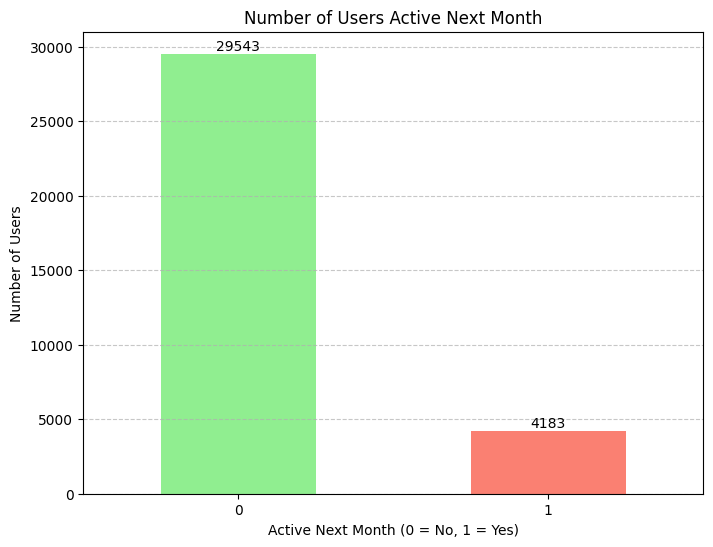

In [ ]:
active_next_month_counts = df['active_next_month'].value_counts()

# Plotting the bar chart for active_next_month
plt.figure(figsize=(8, 6))
active_next_month_counts.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Number of Users Active Next Month')
plt.xlabel('Active Next Month (0 = No, 1 = Yes)')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i, count in enumerate(active_next_month_counts):
    plt.text(i, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

plt.show()

<ipython-input-136-538697eb8c21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='active_next_month', y='total_activity', data=df, palette='pastel')


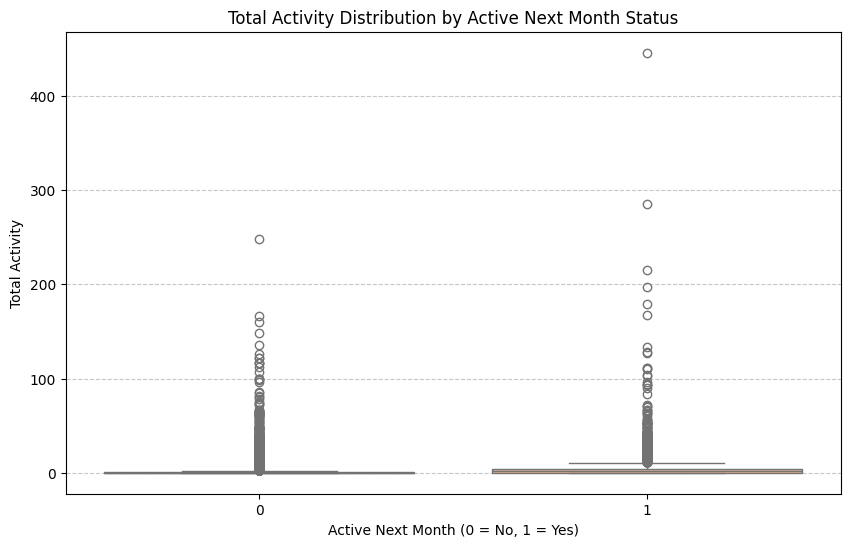

In [ ]:
#Box Plot of Total Activity by Active Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='active_next_month', y='total_activity', data=df, palette='pastel')
plt.title('Total Activity Distribution by Active Next Month Status')
plt.xlabel('Active Next Month (0 = No, 1 = Yes)')
plt.ylabel('Total Activity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Define the aggregation rules
aggregations = {col: 'max' for col in df.columns if col not in ['Successful Submission Count', 'Duration (Days)','Comp_ID','User_ID','useract_month']}
aggregations['Successful Submission Count'] = 'sum'
aggregations['Duration (Days)'] = 'sum'

# Group by 'useract_month' and 'User_ID' and apply the aggregation rules
df = df.groupby(['useract_month', 'User_ID']).agg(aggregations)

# Display the first few rows of the aggregated DataFrame
df.head()

isblog  iscomp  isjob  Remote  Experience  \
useract_month User_ID                                                  
1             ID_004UKSJV       0       0      0     0.0         0.0   
              ID_008D2J6C       0       0      0     0.0         0.0   
              ID_00ETFE7J       1       0      0     0.0         0.0   
              ID_00RKDLAX       0       0      0     0.0         0.0   
              ID_015M2NE1       0       0      0     0.0         0.0   

                           Employment Type  Company Size  \
useract_month User_ID                                      
1             ID_004UKSJV                0           0.0   
              ID_008D2J6C                0           0.0   
              ID_00ETFE7J                0           0.0   
              ID_00RKDLAX                0           0.0   
              ID_015M2NE1                0           0.0   

                           Data Science Functions  Industry_Loc  Industry_Res  \
useract_month User_ID                                                           
1             ID_004UKSJV                     0.0           0.0           0.0   
              ID_008D2J6C                     0.0           0.0           0.0   
              ID_00ETFE7J                     0.0           0.0           0.0   
              ID_00RKDLAX                     0.0           0.0           0.0   
              ID_015M2NE1                     0.0           0.0           0.0   

                           ...  Sector_Health_Safety  \
useract_month User_ID      ...                         
1             ID_004UKSJV  ...                   0.0   
              ID_008D2J6C  ...                   0.0   
              ID_00ETFE7J  ...                   0.0   
              ID_00RKDLAX  ...                   0.0   
              ID_015M2NE1  ...                   0.0   

                           Sector_Technology_Innovation  \
useract_month User_ID                                     
1             ID_004UKSJV                           0.0   
              ID_008D2J6C                           0.0   
              ID_00ETFE7J                           0.0   
              ID_00RKDLAX                           0.0   
              ID_015M2NE1                           0.0   

                           Sector_Transportation_Logistics  \
useract_month User_ID                                        
1             ID_004UKSJV                              0.0   
              ID_008D2J6C                              0.0   
              ID_00ETFE7J                              0.0   
              ID_00RKDLAX                              0.0   
              ID_015M2NE1                              0.0   

                           Sector_Professional_Services  numberOfComments  \
useract_month User_ID                                                       
1             ID_004UKSJV                           0.0               0.0   
              ID_008D2J6C                           0.0               0.0   
              ID_00ETFE7J                           0.0               0.0   
              ID_00RKDLAX                           0.0               0.0   
              ID_015M2NE1                           0.0               0.0   

                           numberOfDiscussions  total_activity  \
useract_month User_ID                                            
1             ID_004UKSJV                  0.0               0   
              ID_008D2J6C                  0.0               0   
              ID_00ETFE7J                  0.0               1   
              ID_00RKDLAX                  0.0               0   
              ID_015M2NE1                  0.0               0   

                           active_next_month  Successful Submission Count  \
useract_month User_ID                                                       
1             ID_004UKSJV                  0                          0.0   
              ID_008D2J6C                  0             

In [ ]:
df = df.reset_index()
df.to_csv('df.csv')
df.head()

,index,useract_month,User_ID,isblog,iscomp,isjob,Remote,Experience,Employment Type,Company Size,...,Sector_Health_Safety,Sector_Technology_Innovation,Sector_Transportation_Logistics,Sector_Professional_Services,numberOfComments,numberOfDiscussions,total_activity,active_next_month,Successful Submission Count,Duration (Days)
0,0,1,ID_004UKSJV,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,1,1,ID_008D2J6C,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,2,1,ID_00ETFE7J,1,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0
3,3,1,ID_00RKDLAX,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,4,1,ID_015M2NE1,0,0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


# baseline model


In [ ]:
df = df[df['useract_month'] != 12]
df.drop('User_ID',inplace=True,axis=1)
df.head()

<ipython-input-129-c9b6f784b64d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('User_ID',inplace=True,axis=1)


,useract_month,isblog,iscomp,isjob,Remote,Experience,Employment Type,Company Size,Data Science Functions,Industry_Loc,...,Sector_Health_Safety,Sector_Technology_Innovation,Sector_Transportation_Logistics,Sector_Professional_Services,numberOfComments,numberOfDiscussions,total_activity,active_next_month,Successful Submission Count,Duration (Days)
0,1,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,1,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,1,1,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0
3,1,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,1,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('active_next_month',axis=1)
y = df['active_next_month']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)


In [ ]:
#apply random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


model = {'RandomForestClassifier':RandomForestClassifier(n_estimators=2000, random_state=42 , class_weight='balanced'),
         'XGBClassifier':XGBClassifier(n_estimators=2000, random_state=42),
         'LGBMClassifier':LGBMClassifier(n_estimators=2000, random_state=42)}

for name , model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train=model.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}\n")
    print("train\n")
    print(classification_report(y_train, y_pred_train))
    print("test\n")
    print(classification_report(y_test, y_pred))




RandomForestClassifier

train

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     15078
           1       0.53      0.74      0.62      1428

    accuracy                           0.92     16506
   macro avg       0.75      0.84      0.79     16506
weighted avg       0.94      0.92      0.93     16506

test

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6465
           1       0.33      0.40      0.36       609

    accuracy                           0.88      7074
   macro avg       0.64      0.66      0.65      7074
weighted avg       0.89      0.88      0.88      7074

XGBClassifier

train

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15078
           1       0.93      0.53      0.67      1428

    accuracy                           0.96     16506
   macro avg       0.94      0.76      0.83     16506
weighted avg   

# preprocessing + Trials



1.   check outliers : since the data is very sparse so it is normal to see outliers but this outliers is important to us.
2.   handle imbalance : can't because it is very imbalance but we can try smote and see the result
1.   try pca or tsne : this in case the model is overfitted but we try to overfitted and it failed
2.   should we do scaling or transformation : we will apply robust scaling to handle the outliers
1.   use grid search (randomsearch , Bayesiansearch) with cv
2.   use multiple ml to find the best one

















In [ ]:
#detect outliers by IQ

continuous_columns = ['Successful Submission Count', 'Duration (Days)', 'numberOfComments', 'numberOfDiscussions', 'Company Size', 'total_activity', 'isblog', 'iscomp', 'isjob']

outliers = pd.DataFrame(columns=['Column', 'Outliers'])

for column in continuous_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    count_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
    outliers.loc[len(outliers)] = [column, count_outliers]

outliers.set_index('Column', inplace=True)
print(outliers)

                             Outliers
Column                               
Successful Submission Count      1379
Duration (Days)                  4775
numberOfComments                  143
numberOfDiscussions               820
Company Size                      590
total_activity                   3479
isblog                            978
iscomp                           3163
isjob                             598


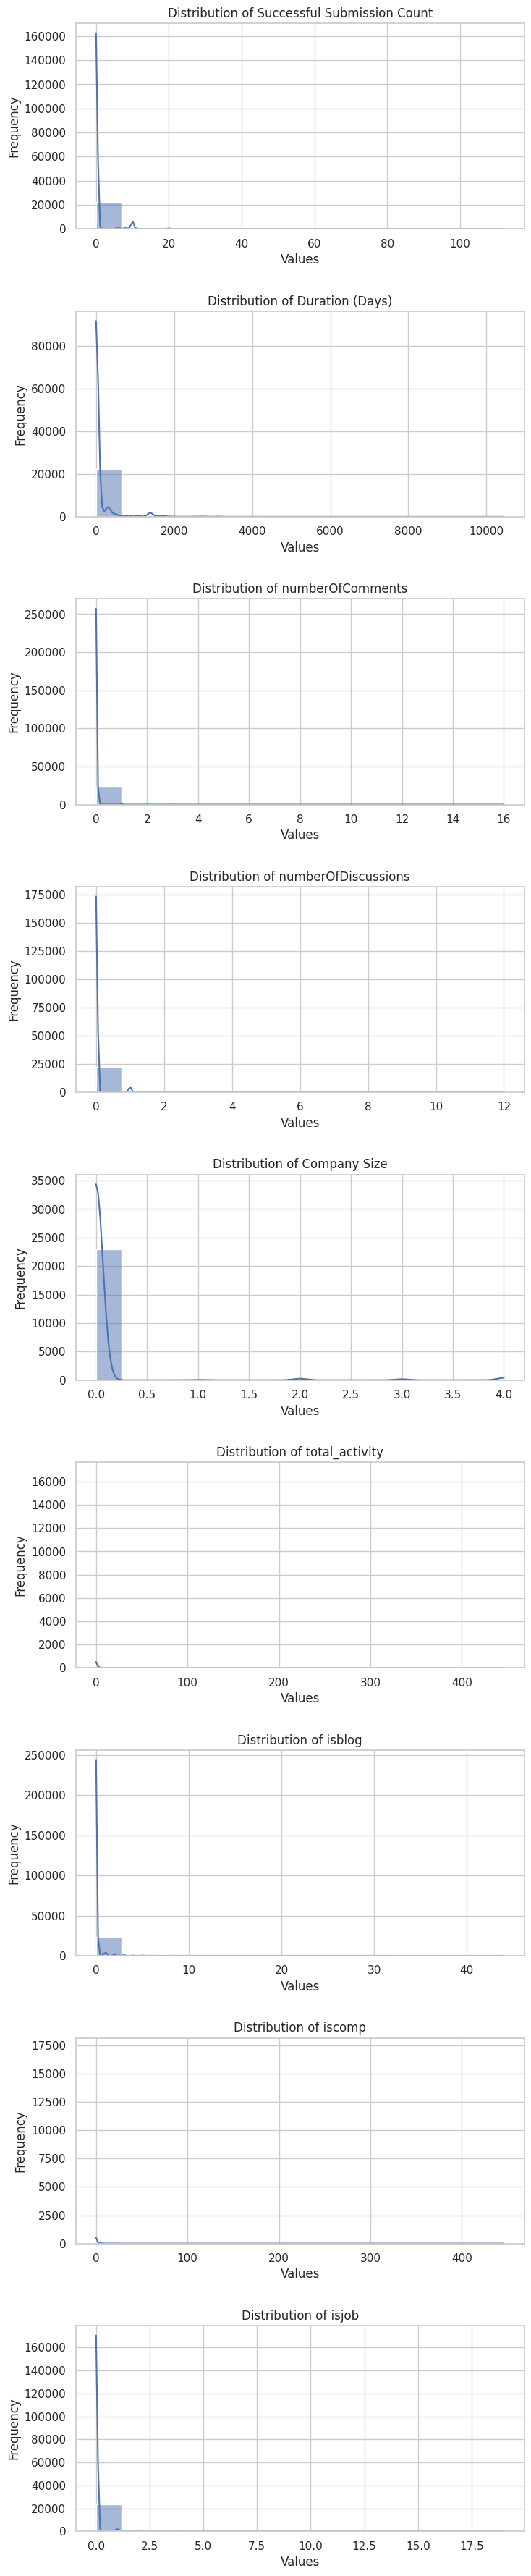

In [ ]:
#plot the historgram of each column
sns.set(style="whitegrid")

fig, axes = plt.subplots(len(continuous_columns), 1, figsize=(8, 5 * len(continuous_columns)))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(continuous_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Histogram with KDE
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.show()

In [ ]:
# feature importance and selection by using pvalue

def perform_anova(df, continuous_columns):
    results = {}
    for column in continuous_columns:
        groups = [df[df['active_next_month'] == category][column] for category in df['active_next_month'].unique()]
        f_val, p_val = stats.f_oneway(*groups)
        results[column] = p_val
    return results

continuous_columns = ['Successful Submission Count', 'Duration (Days)', 'numberOfComments', 'numberOfDiscussions', 'Company Size' , 'total_activity','isblog','iscomp','isjob']
anova_results = perform_anova(df, continuous_columns)

categorical_candidates = df.select_dtypes(include=['number']).columns
categorical_columns = [col for col in categorical_candidates if df[col].nunique() < 10 and col != 'active_next_month']

# Function to perform Chi-Squared test and print the p-value
def perform_chi_squared(df, categorical_columns):
    results = {}
    for column in categorical_columns:
        contingency_table = pd.crosstab(df[column], df['active_next_month'])
        chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
        results[column] = p_val
    return results

# Perform Chi-Squared tests
chi_squared_results = perform_chi_squared(df, categorical_columns)


combined_results = {**anova_results, **chi_squared_results}
results_df = pd.DataFrame(list(combined_results.items()), columns=['Variable', 'P-Value'])
results_df['Significant'] = results_df['P-Value'].apply(lambda p: 'Yes' if p < 0.05 else 'No')
results_df.sort_values(by='P-Value' , inplace=True , ascending=False)
results_df

,Variable,P-Value,Significant
21,Sector_Technology_Innovation,9.164752e-01,No
23,Sector_Professional_Services,1.558942e-01,No
17,Industry_Manuf,1.619840e-03,Yes
18,Sector_Finance,4.463664e-04,Yes
16,Industry_Media,1.424629e-04,Yes
22,Sector_Transportation_Logistics,1.651710e-07,Yes
19,Sector_Government_Public,2.994500e-08,Yes
14,Industry_Loc,5.011423e-09,Yes
10,Remote,1.610363e-09,Yes
15,Industry_Res,1.225171e-14,Yes


In [ ]:
X = df.drop('active_next_month',axis=1)
y = df['active_next_month']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)


In [ ]:
#apply robust scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, balance_weights=False):


    if balance_weights:
        # Calculate class weights
        class_weights = list(compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train))
        class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
        sample_weights = np.array([class_weight_dict[cls] for cls in y_train])

        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"Train {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(classification_report(y_train, y_pred_train))

    print(f"Test {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print(classification_report(y_test, y_pred_test))


In [ ]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=500, max_depth=100, learning_rate=0.01, random_state=42)
}

for model_name, model in models.items():
    # print(f"\n{model_name} without scaling and without balanced weights")
    # train_and_evaluate_model(model, X_train, y_train, X_test, y_test, scaled=False, balance_weights=False)

    print(f"\n{model_name} with scaling and without balanced weights")
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test, balance_weights=False)

    # print(f"\n{model_name} without scaling and with balanced weights")
    # train_and_evaluate_model(model, X_train, y_train, X_test, y_test, scaled=False, balance_weights=True)

    print(f"\n{model_name} with scaling and with balanced weights")
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test, balance_weights=True)


RandomForest with scaling and without balanced weights
Train RandomForestClassifier
Accuracy: 0.9296013570822731
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15078
           1       0.83      0.24      0.37      1428

    accuracy                           0.93     16506
   macro avg       0.88      0.62      0.66     16506
weighted avg       0.92      0.93      0.91     16506

Test RandomForestClassifier
Accuracy: 0.9245122985581001
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6465
           1       0.75      0.19      0.30       609

    accuracy                           0.92      7074
   macro avg       0.84      0.59      0.63      7074
weighted avg       0.91      0.92      0.90      7074


RandomForest with scaling and with balanced weights
Train RandomForestClassifier
Accuracy: 0.8313946443717436
              precision    recall  f1-score   support

         

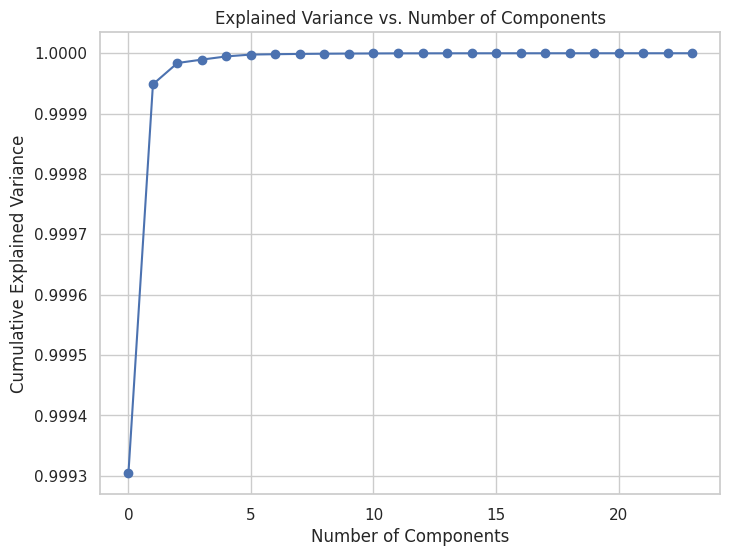

Optimal number of components: 2


In [ ]:
# try PCA to reduce overfit and deal with sparse data

pca = PCA().fit(X_train_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Step 3: Choose the optimal number of components (e.g., where 95% variance is explained)
optimal_n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9999) + 1
print(f"Optimal number of components: {optimal_n_components}")

# Step 4: Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=500, max_depth=100, learning_rate=0.01, random_state=42)
}

for model_name, model in models.items():
    print(f"\n{model_name} with scaling and with balanced weights and smote")
    train_and_evaluate_model(model, X_train_pca, y_train, X_test_pca, y_test)

    print(f"\n{model_name} with scaling and without balanced weights and smote")
    train_and_evaluate_model(model, X_train_pca, y_train, X_test_pca, y_test)


RandomForest with scaling and with balanced weights and smote
Train RandomForestClassifier
Accuracy: 0.9288137646916272
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15078
           1       0.81      0.23      0.36      1428

    accuracy                           0.93     16506
   macro avg       0.87      0.61      0.66     16506
weighted avg       0.92      0.93      0.91     16506

Test RandomForestClassifier
Accuracy: 0.9171614362454057
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6465
           1       0.57      0.16      0.25       609

    accuracy                           0.92      7074
   macro avg       0.75      0.58      0.60      7074
weighted avg       0.90      0.92      0.90      7074


RandomForest with scaling and without balanced weights and smote
Train RandomForestClassifier
Accuracy: 0.9288137646916272
              precision    recall  f1-score 

In [ ]:
#try smote
from imblearn.over_sampling import SMOTE

print(y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(y_train_smote.value_counts())


active_next_month
0    15078
1     1428
Name: count, dtype: int64
active_next_month
0    15078
1    15078
Name: count, dtype: int64


In [ ]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=500, max_depth=100, learning_rate=0.01, random_state=42)
}

for model_name, model in models.items():
    print(f"\n{model_name} with scaling and with balanced weights and smote")
    train_and_evaluate_model(model, X_train_smote, y_train_smote, x_test_scaled, y_test, balance_weights=True)

    print(f"\n{model_name} with scaling and without balanced weights and smote")
    train_and_evaluate_model(model, X_train_smote, y_train_smote, x_test_scaled, y_test, balance_weights=False )




RandomForest with scaling and with balanced weights and smote
Train RandomForestClassifier
Accuracy: 0.8062408807534156
              precision    recall  f1-score   support

           0       0.77      0.87      0.82     15078
           1       0.85      0.75      0.79     15078

    accuracy                           0.81     30156
   macro avg       0.81      0.81      0.81     30156
weighted avg       0.81      0.81      0.81     30156

Test RandomForestClassifier
Accuracy: 0.8488832343794176
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6465
           1       0.32      0.69      0.44       609

    accuracy                           0.85      7074
   macro avg       0.64      0.78      0.68      7074
weighted avg       0.91      0.85      0.87      7074


RandomForest with scaling and without balanced weights and smote
Train RandomForestClassifier
Accuracy: 0.8062408807534156
              precision    recall  f1-score 

# Final Result

In [ ]:
X = df.drop('active_next_month',axis=1)
y = df['active_next_month']
#splitting
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

#apply robustscaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

#apply smote
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Cross-validation setup
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models = {
    'XGBoost': XGBClassifier(random_state=0),
    'LGBM': LGBMClassifier(random_state=0)
}

# Define parameter grids for each model
param_grids = {
    'XGBoost': {
        'n_estimators' :[100, 300, 500, 800, 1000],
        'max_depth' : [4, 10, 25, 50, 100],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    },
    'LGBM': {
        'n_estimators' :[100, 300, 500, 800, 1000],
        'max_depth' : [4, 10, 25, 50, 100],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    }
}

# Perform RandomizedSearchCV for each model
for name, model in models.items():
    print(f"Running RandomizedSearchCV for {name}...")
    RScv = RandomizedSearchCV(model, param_distributions=param_grids[name], cv=CV, scoring='accuracy', n_jobs=-1, n_iter=50, random_state=42)
    RScv.fit(X_train_smote, y_train_smote)

    best_params = RScv.best_params_
    best_score = RScv.best_score_

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best accuracy score for {name}: {best_score}")


In [ ]:
models = {
    'XGBoost': XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=500, max_depth=100, learning_rate=0.01, random_state=42)
}


for model_name, model in models.items():
  print(f'{model_name} training')
  model.fit(X_train_smote, y_train_smote)
  y_pred_train = model.predict(X_train_smote)
  y_pred_test = model.predict(x_test_scaled)
  print(f"Train {model.__class__.__name__}")
  print(classification_report(y_test, y_pred_test))


XGBoost training
Train XGBClassifier
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6465
           1       0.37      0.47      0.41       609

    accuracy                           0.89      7074
   macro avg       0.66      0.70      0.67      7074
weighted avg       0.90      0.89      0.89      7074

LightGBM training
[LightGBM] [Info] Number of positive: 15078, number of negative: 15078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4419
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Train LGBMClassifier
              precision    recall  f1-score   support

           0       0.95      0.91      